# Prediction the fule consumption of cars

# 1.Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2.Load the Data Set

In [2]:
data=pd.read_csv('auto-mpg.csv')

# 3.Exploratory data analysis(EDA)

In [3]:
data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.shape

(398, 9)

In [6]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
data.describe().T

count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model year      79.000    82.0  
origin           2.000     3.0

<AxesSubplot:>

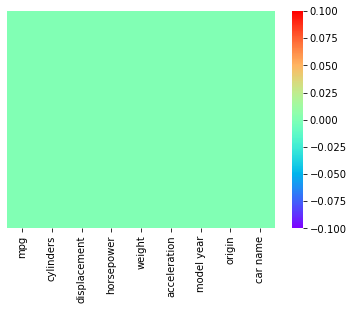

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='rainbow')

In [9]:
#checking for duplicated values

data.duplicated().sum()

0

# we have zero duplicated values


we have zero duplicated values

checking for value counts in categorical columns

categorical columns are cylinders, model_year,origin car_name

In [10]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [11]:
data['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64

In [12]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [13]:
data['car name'].nunique()

305

In [14]:
data['car name'].value_counts().head(24)

ford pinto                   6
toyota corolla               5
amc matador                  5
ford maverick                5
chevrolet chevette           4
amc gremlin                  4
chevrolet impala             4
peugeot 504                  4
amc hornet                   4
toyota corona                4
ford gran torino             3
chevrolet caprice classic    3
honda civic                  3
volkswagen dasher            3
dodge colt                   3
chevrolet citation           3
chevrolet nova               3
pontiac catalina             3
plymouth fury iii            3
ford galaxie 500             3
chevrolet vega               3
plymouth duster              3
amc matador (sw)             2
volkswagen rabbit            2
Name: car name, dtype: int64

we found that car_name column in the dats is not used for model since there aere few car names which are repeated  

but we can extract some information from that such as brand of the car

In [15]:
data['car name'].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

we can see pattern among those names

brand name,model_varient

lets extract brand information from the car_name column

In [16]:
data['brand']=data['car name'].str.extract('(^.*?)\s')
#brand=data['brand']
#brands=data['brand'].unique().astype('str')
#brands

data['brand'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
opel              4
chevy             3
bmw               2
subaru            2
maxda             2
mercedes-benz     2
cadillac          2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: brand, dtype: int64

there are few brand names which are repeated but in different letters

for example chevrolet is repeated as chevy,chevroelt

so lets replace thode brand names as basic brand names

In [17]:
data['brand']=data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand']=data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand']=data['brand'].replace(['toyouta','toyota'],'toyota')
data['brand']=data['brand'].replace('nissan','datsun')
data['brand']=data['brand'].replace('capri','ford')
data['brand']=data['brand'].replace(['mercedes'],'mercedes-benz')
data['brand']=data['brand'].replace('maxda','mazda')

In [18]:
#checking for any null values in the brand 

data[data['brand'].isnull()]

mpg  cylinders  displacement horsepower  weight  acceleration  \
150  26.0          4         108.0         93    2391          15.5   
346  32.3          4          97.0         67    2065          17.8   

     model year  origin car name brand  
150          74       3   subaru   NaN  
346          81       3   subaru   NaN

we found thta there are two null values 

we can fill those values eith their car names 

In [19]:
data['brand'].fillna('sabaru',inplace=True)

In [21]:
data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name      brand  
0       1  chevrolet chevelle malibu  chevrolet  
1       1          buick skylark 320      buick  
2       1         plymouth satellite   plymouth  
3       1              amc rebel sst        amc  
4       1                ford torino       ford

In [22]:
data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name      brand  
0       1  chevrolet chevelle malibu  chevrolet  
1       1          buick skylark 320      buick  
2       1         plymouth satellite   plymouth  
3       1              amc rebel sst        amc  
4       1                ford torino       ford

In [23]:
data['brand']=data['brand'].str.capitalize()

In [24]:
data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name      brand  
0       1  chevrolet chevelle malibu  Chevrolet  
1       1          buick skylark 320      Buick  
2       1         plymouth satellite   Plymouth  
3       1              amc rebel sst        Amc  
4       1                ford torino       Ford

In [25]:
def country(x):
    if x==1:
        return 'USA'
    elif x==2:
        return 'Europe'
    elif x==3:
        return 'Japan'
    

In [26]:
data['origin']=data['origin'].apply(country)

In [27]:
data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

  origin                   car name      brand  
0    USA  chevrolet chevelle malibu  Chevrolet  
1    USA          buick skylark 320      Buick  
2    USA         plymouth satellite   Plymouth  
3    USA              amc rebel sst        Amc  
4    USA                ford torino       Ford

plotting pairplots in order to visualize any outliers in dataset

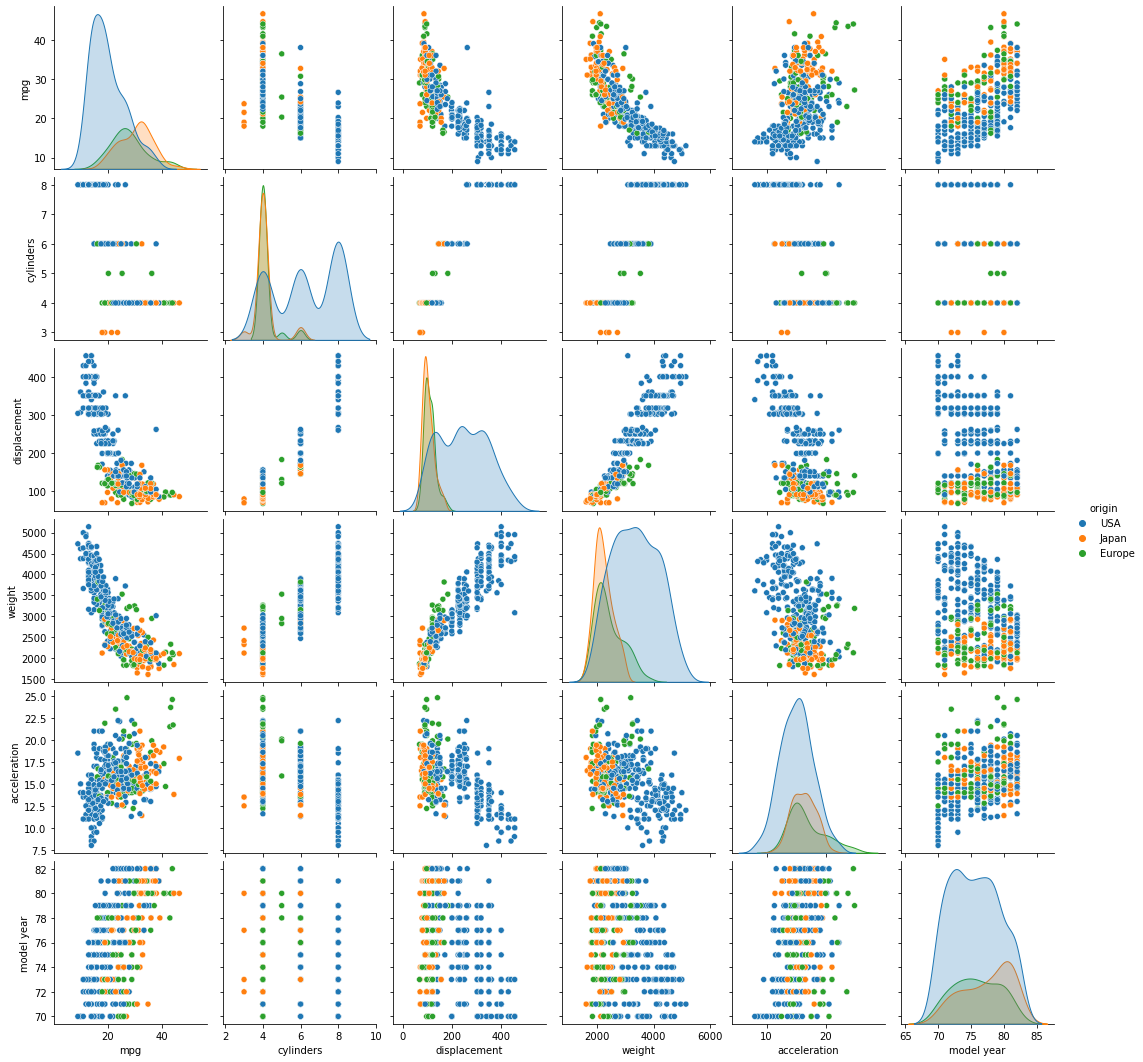

In [28]:
sns.pairplot(data,hue='origin')

in pairplot we can see that horsepower column in=s not plotted 

so there is something wrong with horsepower column 

lets look into horsepower column

In [29]:
data['horsepower'].head(50)

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
32      ?
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
41    150
42    180
43    170
44    175
45    110
46     72
47    100
48     88
49     86
Name: horsepower, dtype: object

we can see that there are some question marks in this column

lets check how many are there now

In [30]:
data[data['horsepower']=='?']

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin              car name    brand  
32           71     USA            ford pinto     Ford  
126          74     USA         ford maverick     Ford  
330          80  Europe  renault lecar deluxe  Renault  
336          80     USA    ford mustang cobra     Ford  
354          81  Europe           renault 18i  Renault  
374          82     USA        amc concord dl      Amc

In [31]:
data[data['car name']=='ford pinto']

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
112  19.0          4         122.0         85    2310          18.5   
130  26.0          4         122.0         80    2451          16.5   
168  23.0          4         140.0         83    2639          17.0   
174  18.0          6         171.0         97    2984          14.5   
206  26.5          4         140.0         72    2565          13.6   

     model year origin    car name brand  
32           71    USA  ford pinto  Ford  
112          73    USA  ford pinto  Ford  
130          74    USA  ford pinto  Ford  
168          75    USA  ford pinto  Ford  
174          75    USA  ford pinto  Ford  
206          76    USA  ford pinto  Ford

In [32]:
data[data['car name']=='ford maverick']

mpg  cylinders  displacement horsepower  weight  acceleration  \
17   21.0          6         200.0         85    2587          16.0   
100  18.0          6         250.0         88    3021          16.5   
126  21.0          6         200.0          ?    2875          17.0   
155  15.0          6         250.0         72    3158          19.5   
193  24.0          6         200.0         81    3012          17.6   

     model year origin       car name brand  
17           70    USA  ford maverick  Ford  
100          73    USA  ford maverick  Ford  
126          74    USA  ford maverick  Ford  
155          75    USA  ford maverick  Ford  
193          76    USA  ford maverick  Ford

lets replace these with median of the same column

In [33]:
cars=data[data['horsepower']=='?']['car name'].unique()
cars

array(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype=object)

In [34]:
for car in cars:
    med=0
    brand=data[data['car name']==cars[3]]['brand'].values
    med=data.loc[(data['brand']==brand[0]) & (data['horsepower']!='?'),'horsepower'].median()
    
    data.loc[(data["car name"]==car) & (data["horsepower"]=='?'),"horsepower"]=np.nan
    data.fillna(med,inplace=True)
    med_brand=data.loc[(data["brand"]==brand[0]) & (data["horsepower"]!='?'),"horsepower"].median()
    data.fillna(med_brand,inplace=True)


In [35]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'brand'],
      dtype='object')

In [36]:
data[data['brand']=='Ford']

mpg  cylinders  displacement horsepower  weight  acceleration  \
4    17.0          8         302.0        140    3449          10.5   
5    15.0          8         429.0        198    4341          10.0   
17   21.0          6         200.0         85    2587          16.0   
25   10.0          8         360.0        215    4615          14.0   
32   25.0          4          98.0       92.0    2046          19.0   
36   19.0          6         250.0         88    3302          15.5   
40   14.0          8         351.0        153    4154          13.5   
43   13.0          8         400.0        170    4746          12.0   
48   18.0          6         250.0         88    3139          14.5   
61   21.0          4         122.0         86    2226          16.5   
65   14.0          8         351.0        153    4129          13.0   
74   13.0          8         302.0        140    4294          16.0   
80   22.0          4         122.0         86    2395          16.0   
88   14.0          8         302.0        137    4042          14.5   
92   13.0          8         351.0        158    4363          13.0   
100  18.0          6         250.0         88    3021          16.5   
104  12.0          8         400.0        167    4906          12.5   
112  19.0          4         122.0         85    2310          18.5   
126  21.0          6         200.0       92.0    2875          17.0   
130  26.0          4         122.0         80    2451          16.5   
136  16.0          8         302.0        140    4141          14.0   
139  14.0          8         302.0        140    4638          16.0   
155  15.0          6         250.0         72    3158          19.5   
159  14.0          8         351.0        148    4657          13.5   
166  13.0          8         302.0        129    3169          12.0   
168  23.0          4         140.0         83    2639          17.0   
174  18.0          6         171.0         97    2984          14.5   
184  25.0          4         140.0         92    2572          14.9   
190  14.5          8         351.0        152    4215          12.8   
193  24.0          6         200.0         81    3012          17.6   
200  18.0          6         250.0         78    3574          21.0   
206  26.5          4         140.0         72    2565          13.6   
214  13.0          8         302.0        130    3870          15.0   
228  18.5          6         250.0         98    3525          19.0   
232  16.0          8         351.0        149    4335          14.5   
236  25.5          4         140.0         89    2755          15.8   
245  36.1          4          98.0         66    1800          14.4   
254  20.2          6         200.0         85    2965          15.8   
255  25.1          4         140.0         88    2720          15.4   
264  18.1          8         302.0        139    3205          11.2   
282  22.3          4         140.0         88    2890          17.3   
286  17.6          8         302.0        129    3725          13.4   
290  15.5          8         351.0        142    4054          14.3   
314  26.4          4         140.0         88    2870          18.1   
336  23.6          4         140.0       92.0    2905          14.3   
351  34.4          4          98.0         65    2045          16.2   
352  29.9          4          98.0         65    2380          20.7   
365  20.2          6         200.0         88    3060          17.1   
373  24.0          4         140.0         92    2865          16.4   
389  22.0          6         232.0        112    2835          14.7   
393  27.0          4         140.0         86    2790          15.6   
396  28.0          4         120.0         79    2625          18.6   

     model year origin                  car name brand  
4            70    USA               ford torino  Ford  
5            70    USA          ford galaxie 500  Ford  
17           70    USA             ford maverick  Ford  
25           7

In [37]:
data['horsepower']=data['horsepower'].astype(int)

In [38]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year origin                   car name      brand  
0          70    USA  chevrolet chevelle malibu  Chevrolet  
1          70    USA          buick skylark 320      Buick  
2          70    USA         plymouth satellite   Plymouth  
3          70    USA              amc rebel sst        Amc  
4          70    USA                ford torino       Ford

In [39]:
data['horsepower'].head(60)

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
32     92
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
41    150
42    180
43    170
44    175
45    110
46     72
47    100
48     88
49     86
50     90
51     70
52     76
53     65
54     69
55     60
56     70
57     95
58     80
59     54
Name: horsepower, dtype: int32

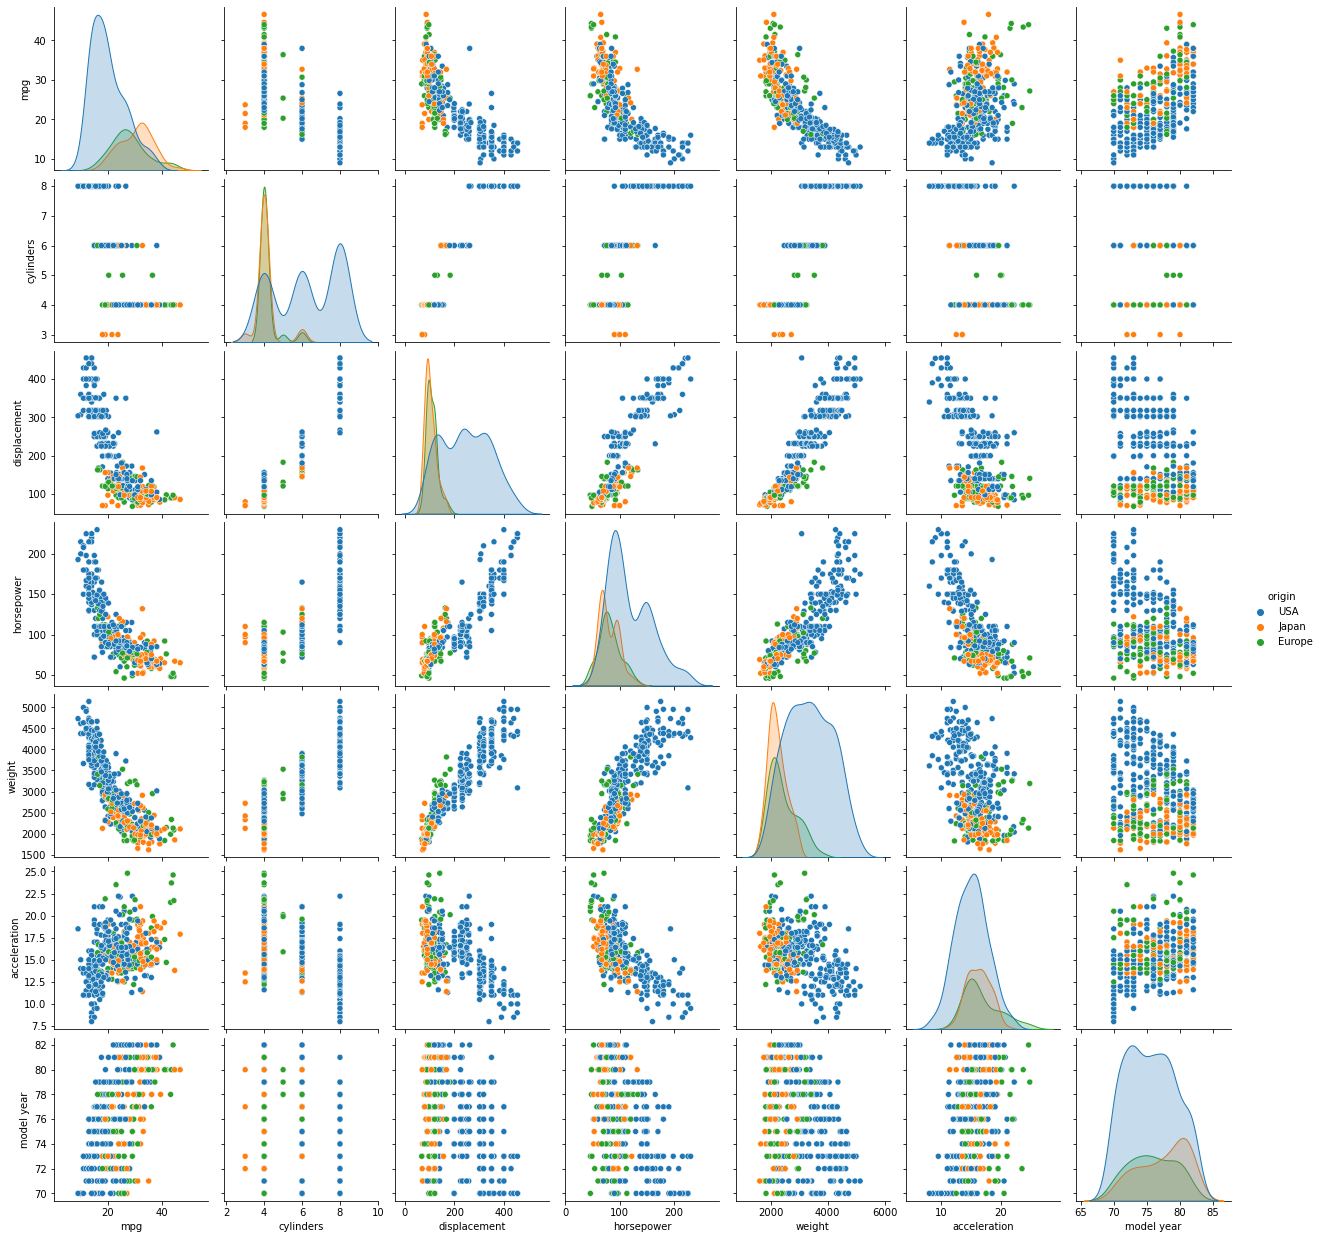

In [40]:
sns.pairplot(data,hue='origin')

<AxesSubplot:>

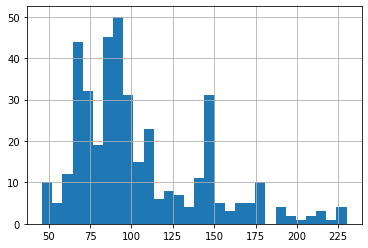

In [41]:
#visualizing the distribution of horsepower 

data['horsepower'].hist(bins=30)

no of brands from each origin 

In [42]:
plt.figure(figsize=(20,8))
brands_USA=data[data["origin"]=="USA"]["brand"]
brands_Europe=data[data["origin"]=="Europe"]["brand"]
brands_Japan=data[data["origin"]=="Japan"]["brand"]
brand_origin=pd.DataFrame([["USA",brands_USA.nunique()],["Europe",brands_Europe.nunique()],["Japan",brands_Japan.nunique()]],
                          columns=["Origin Country","Total no. of brands"])
brand_origin

Origin Country  Total no. of brands
0            USA                   12
1         Europe                   11
2          Japan                    6

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

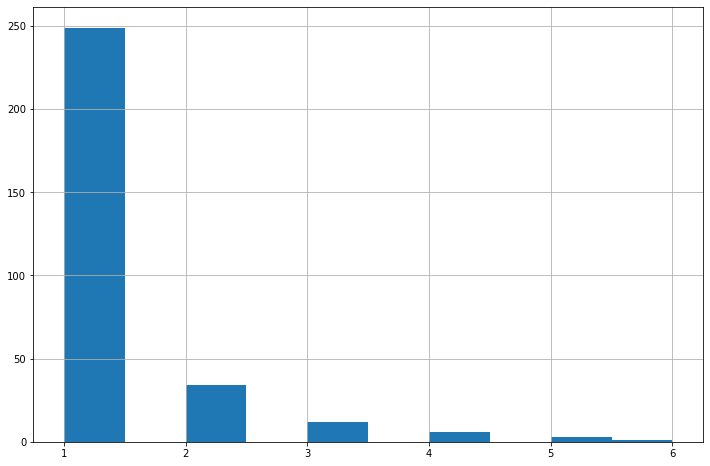

In [43]:
plt.figure(figsize=(12,8))
data['car name'].value_counts().hist()

In [44]:
data['car name'].nunique()

305

most of the car names are comomon so there is no useful information from thta column lets drop that column

In [45]:
data=data.drop('car name',axis=1)

In [46]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year origin      brand  
0          70    USA  Chevrolet  
1          70    USA      Buick  
2          70    USA   Plymouth  
3          70    USA        Amc  
4          70    USA       Ford

correlation of data

In [47]:
data.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773655 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841525  0.896017   
displacement -0.804203   0.950721      1.000000    0.895984  0.932824   
horsepower   -0.773655   0.841525      0.895984    1.000000  0.862615   
weight       -0.831741   0.896017      0.932824    0.862615  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686843 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413978 -0.306564   

              acceleration  model year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.686843   -0.413978  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model year        0.288137    1.000000

# 4.Data Visualization

In [48]:
sns.set_palette('bright')

In [49]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year origin      brand  
0          70    USA  Chevrolet  
1          70    USA      Buick  
2          70    USA   Plymouth  
3          70    USA        Amc  
4          70    USA       Ford

# 4.1 plots for categorical columns

no of cars belonging to each origin

<AxesSubplot:title={'center':'No of cars according to origin'}, xlabel='origin', ylabel='count'>

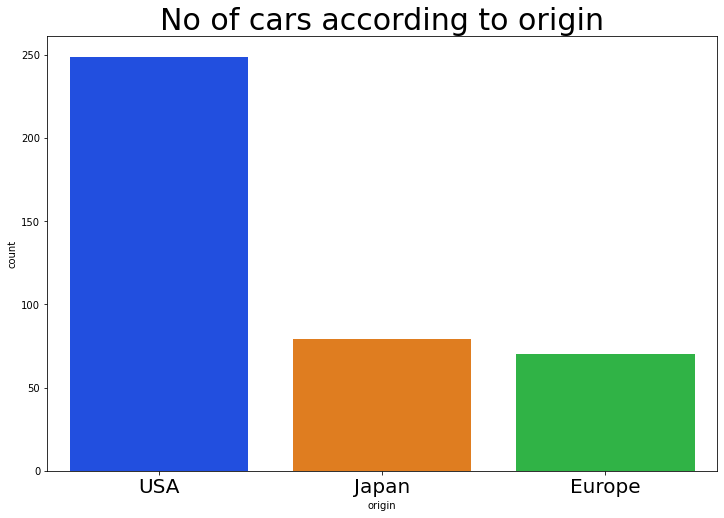

In [50]:
plt.figure(figsize=(12,8))
plt.title("No of cars according to origin",fontsize=30)
plt.xticks(fontsize=20)
sns.countplot(data['origin'])

usa has more no of cars 

japan has second most no of cars 

# 2.no of cars belonging to total no of cylinders

<AxesSubplot:title={'center':'no of cars belonging to total no of cylinders'}, xlabel='cylinders', ylabel='count'>

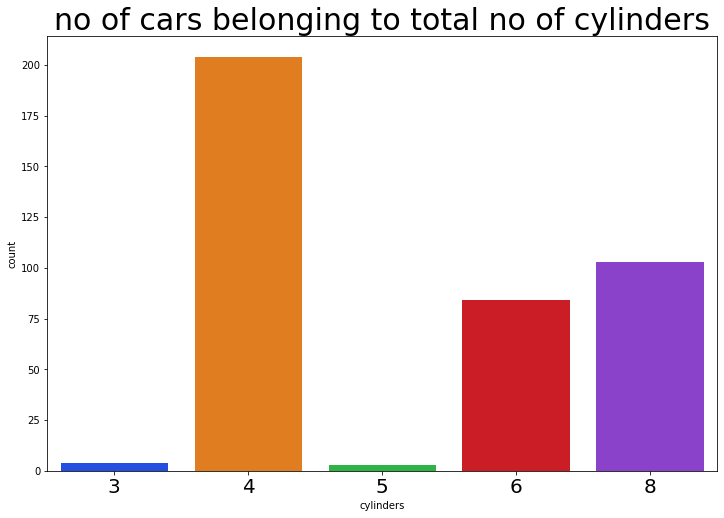

In [51]:
plt.figure(figsize=(12,8))
plt.title("no of cars belonging to total no of cylinders",fontsize=30)
plt.xticks(fontsize=20)
sns.countplot(data["cylinders"])


there are more number of cars with 4 cylinders followed by 8 and 6

# 3.no of cars belonging to total  no of cylinders present in each origin(country)

<AxesSubplot:title={'center':'number of cars belng to total no of cylinders in each origin'}, xlabel='cylinders', ylabel='count'>

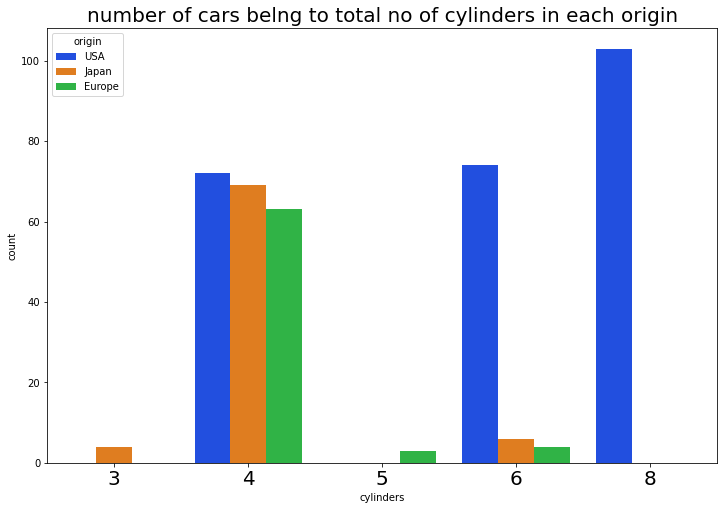

In [52]:
plt.figure(figsize=(12,8))
plt.title('number of cars belng to total no of cylinders in each origin',fontsize=20)
plt.xticks(fontsize=20)
sns.countplot(x='cylinders',data=data,hue='origin')

only usa has 8 cylinders
similarly only japas have 3 cylinders 
europe have 5 cylinders

# there are more cars with 4 cylinders 

# 4.no of cars belong to each model year 

<AxesSubplot:title={'center':'no of cars belong to each model year'}, xlabel='model year', ylabel='count'>

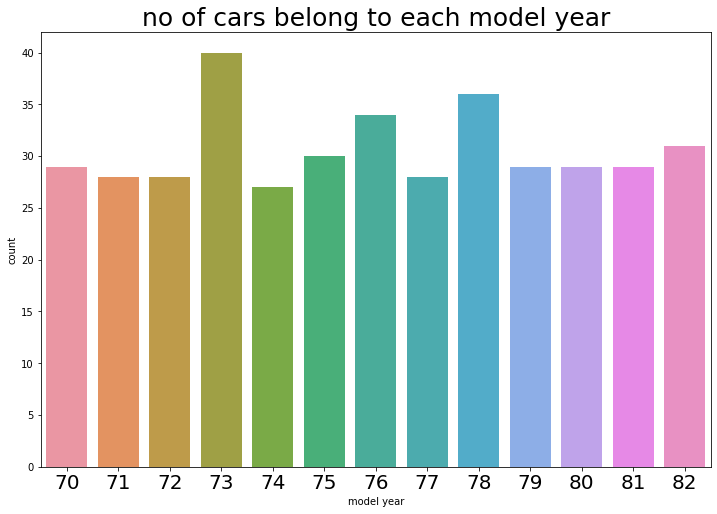

In [53]:
plt.figure(figsize=(12,8))
plt.title("no of cars belong to each model year",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(data['model year'])

cars of model year 73 has more no of cars 

other model years are almost distributed similarly 

# 5. no of cars belonging to each brand

<AxesSubplot:title={'center':'no of cars belonging to each brand'}, xlabel='brand', ylabel='count'>

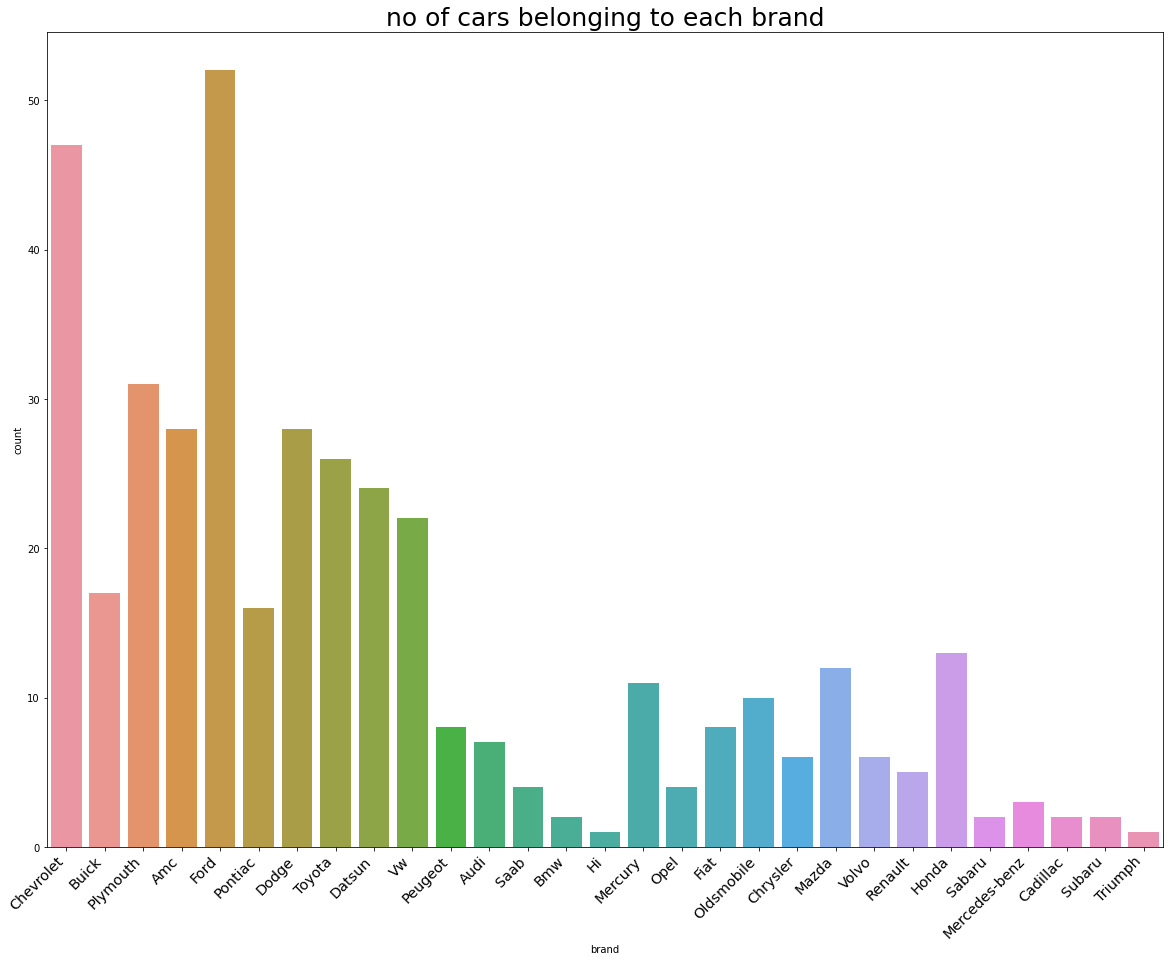

In [54]:
plt.figure(figsize=(20,15))
plt.title("no of cars belonging to each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
sns.countplot(data["brand"])


no of brands from each origin

<AxesSubplot:title={'center':'total no of brands from each origin'}, xlabel='Origin Country', ylabel='Total no. of brands'>

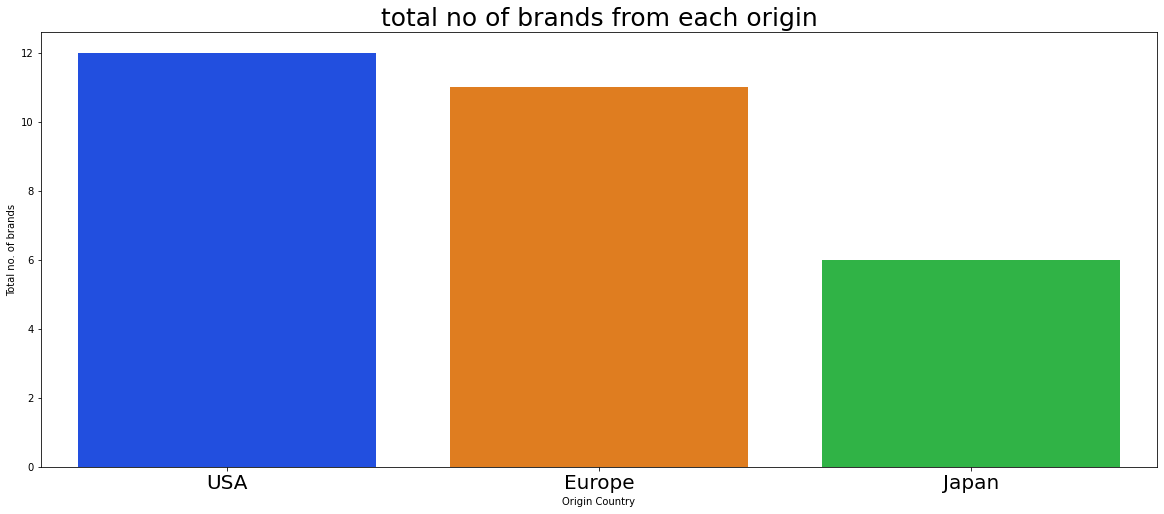

In [55]:
plt.figure(figsize=(20,8))
plt.title("total no of brands from each origin",fontsize=25)
plt.xticks(fontsize=20)

sns.barplot(data=brand_origin ,x="Origin Country",y="Total no. of brands")


# 5. no of cars according to brand in top 20 cars with highest mpg values

<AxesSubplot:title={'center':'Number of cars according to brand in Top 20 cars with highest mpg'}, xlabel='brand', ylabel='count'>

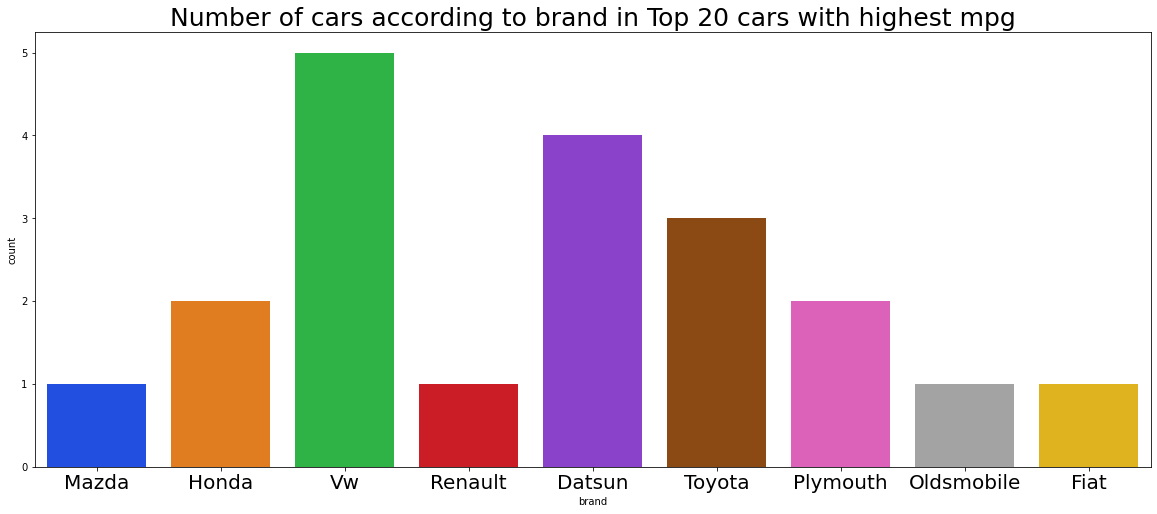

In [56]:
plt.figure(figsize=(20,8))
plt.title("Number of cars according to brand in Top 20 cars with highest mpg",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(data.sort_values(by="mpg",ascending=False)["brand"][:20])

volkswagen has 5 cars followed by datsun with 4

# 6. avg mpg of cars in each cylinders from each origin

<AxesSubplot:title={'center':'average mpg of cars in each cylinders from each origin'}, xlabel='cylinders', ylabel='mpg'>

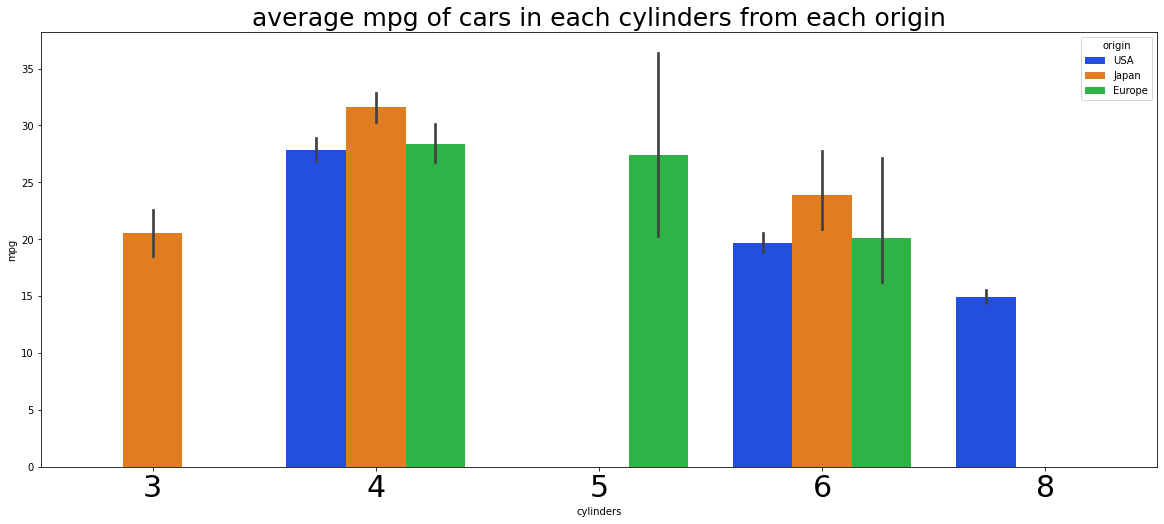

In [57]:
plt.figure(figsize=(20,8))
plt.title("average mpg of cars in each cylinders from each origin",fontsize=25)
plt.xticks(fontsize=30)

sns.barplot(x='cylinders', y='mpg',data=data,hue='origin')


cars with 8 cylinders have least mpg values 

# Average mpg of cars in each model year from each origin

<AxesSubplot:title={'center':' MPG values acoording to Model year from each Origin'}, xlabel='model year', ylabel='mpg'>

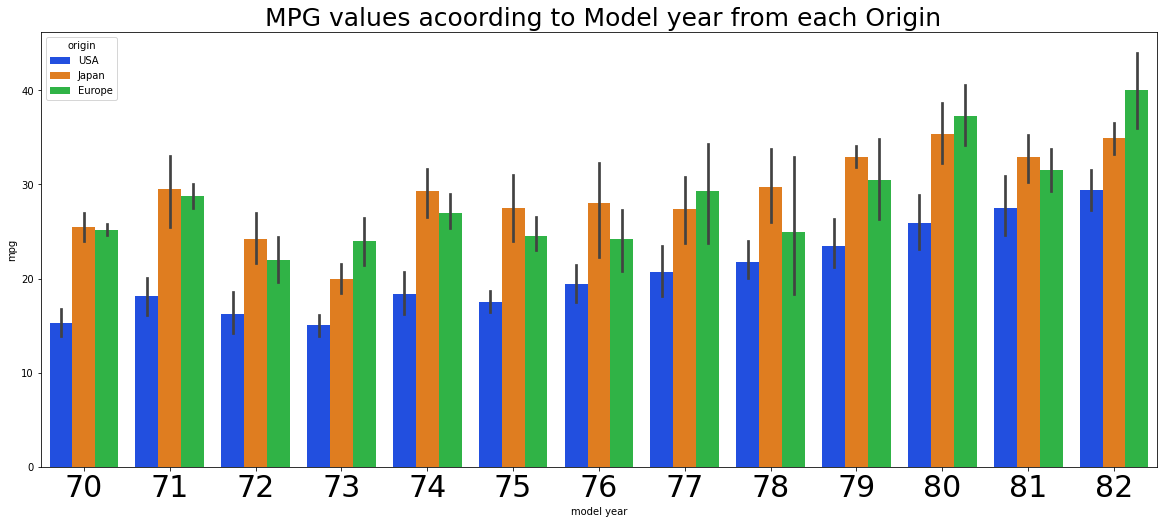

In [58]:
plt.figure(figsize=(20,8))
plt.title(" MPG values acoording to Model year from each Origin",fontsize=25)
plt.xticks(fontsize=30)
sns.barplot(x='model year',y='mpg',data=data,hue="origin")

mpg values is increasing foe evry model year 

japan cars have the most number of highest averages of each year

europe cars have improved avg mpg values much bettwr in 82 model year

<AxesSubplot:title={'center':'Average mpg values according to model year'}, xlabel='model year', ylabel='mpg'>

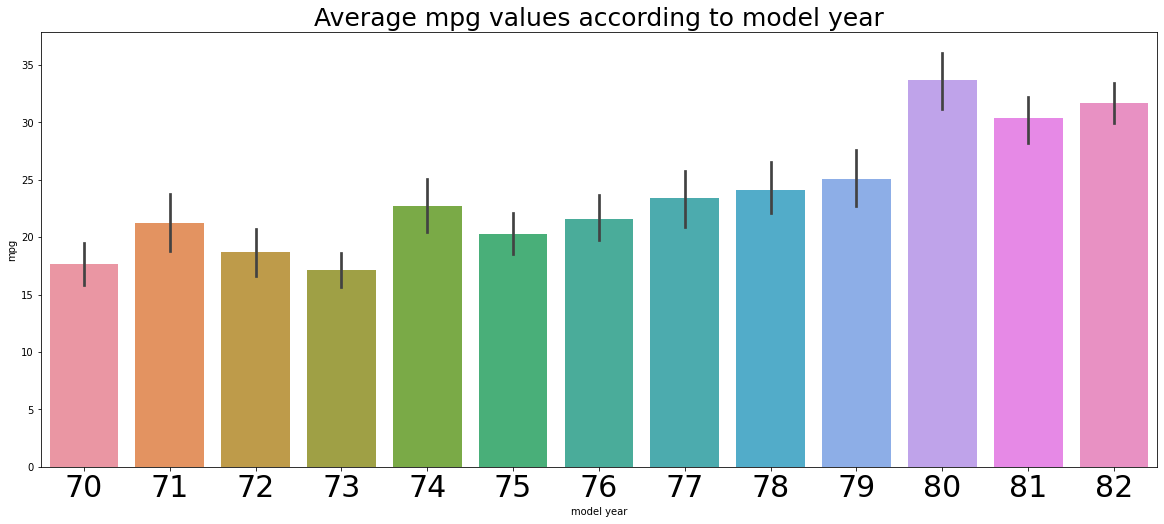

In [59]:
plt.figure(figsize=(20,8))
plt.title("Average mpg values according to model year",fontsize=25)
plt.xticks(fontsize=30)
sns.barplot(y='mpg',x='model year',data=data)

cars of model year 80 has highest avg mpg values 

# Mpg values of each brand

<AxesSubplot:title={'center':'Mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

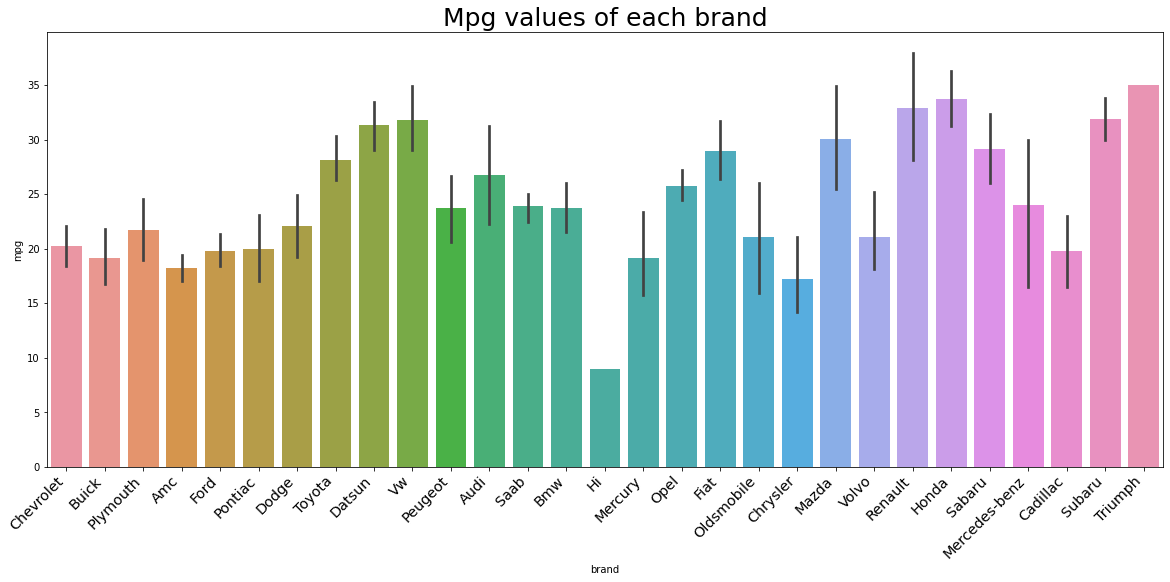

In [60]:
plt.figure(figsize=(20,8))
plt.title("Mpg values of each brand",fontsize=25)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
sns.barplot(y='mpg',x='brand',data=data)

# Max mpg value of each brand

<AxesSubplot:title={'center':'Max MPG values of each brand'}, xlabel='brand', ylabel='mpg'>

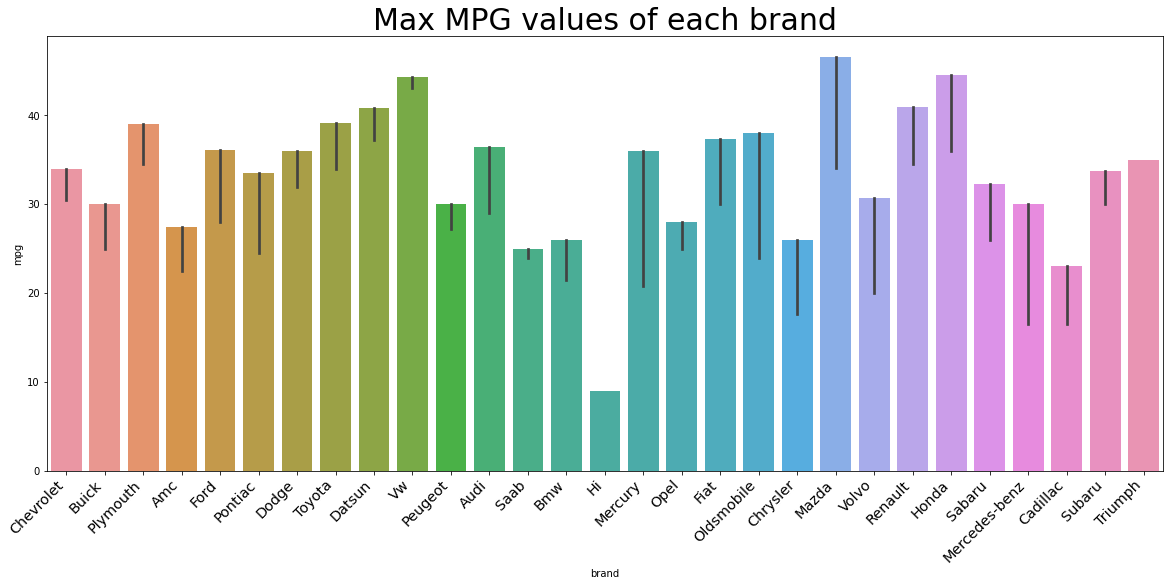

In [61]:
plt.figure(figsize=(20,8))
plt.title("Max MPG values of each brand",fontsize=30)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')

sns.barplot(x="brand",y="mpg",data=data,estimator=max)

 as we can seee MAZDA brand has the highest mpg values and HI brand has the lowest mpg values 
 
 RENAULT brand has the highest average mpg values 

# no of cars according to brand in top 20 cars with highest acceleration

<AxesSubplot:title={'center':'no of cars according to brand in top 20 cars with highest acceleration'}, xlabel='brand', ylabel='count'>

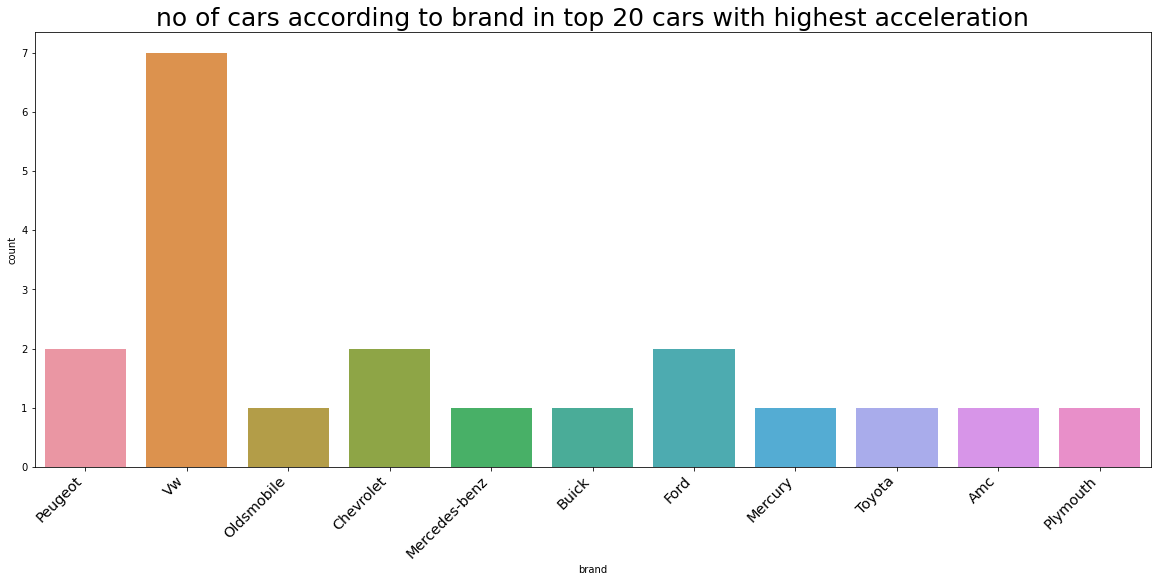

In [62]:
plt.figure(figsize=(20,8))
plt.title("no of cars according to brand in top 20 cars with highest acceleration",fontsize=25)
plt.xticks(rotation=45,horizontalalignment="right",fontweight="light",fontsize='x-large')
sns.countplot(data.sort_values(by="acceleration",ascending=False)["brand"][:20])          

volkswagen has most no of cars in Top 20 cars with highest acceleration

# Average of mpg values according to origin

<AxesSubplot:title={'center':'Average mpg values according to origin'}, xlabel='origin', ylabel='mpg'>

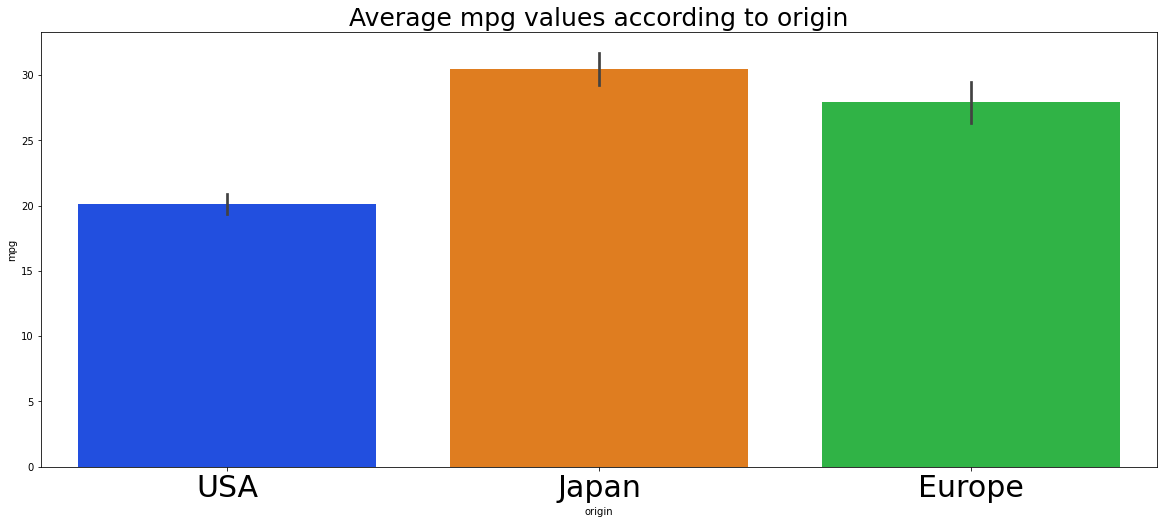

In [63]:
plt.figure(figsize=(20,8))
plt.title("Average mpg values according to origin",fontsize=25)
plt.xticks(fontsize=30)
sns.barplot(y='mpg',x='origin',data=data)


Japan has highr=est average mog values and followed by europe 

usa has least average mpg values 

# 4.2. Plots for numerical features 

1.Distribution plots

distribution of mpg values 

<AxesSubplot:title={'center':'Distribution of MPG'}, xlabel='mpg', ylabel='Density'>

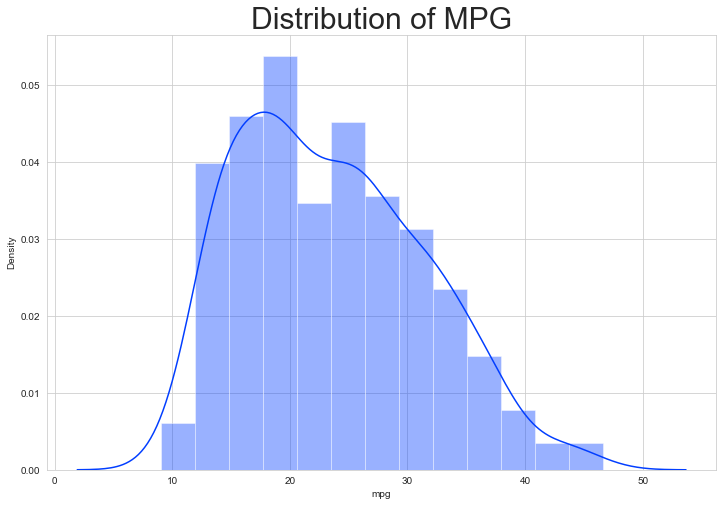

In [64]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))
plt.title("Distribution of MPG",fontsize=30)

sns.distplot(data['mpg'])

Distribution of weight of cars

<AxesSubplot:title={'center':'Distribution of weight of cars'}, xlabel='weight', ylabel='Density'>

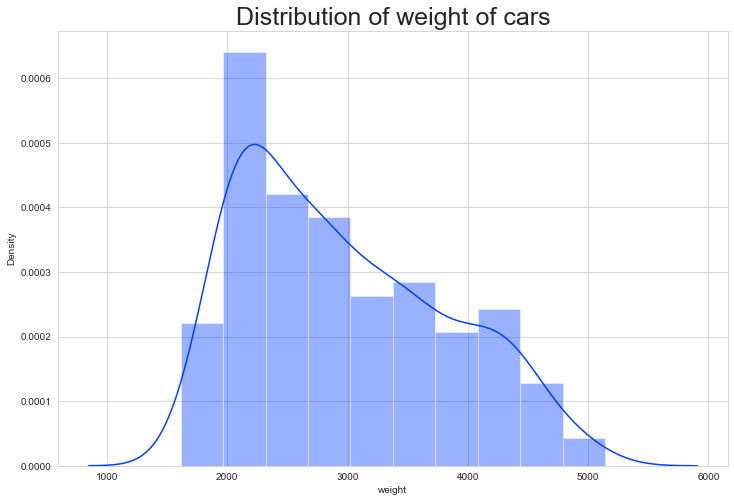

In [65]:
plt.figure(figsize=(12,8))
plt.title("Distribution of weight of cars",fontsize=25)
sns.distplot(data["weight"])

In [66]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'brand'],
      dtype='object')

Distribution of acceleration of cars

<AxesSubplot:title={'center':'Distribution of Acceleration'}, xlabel='acceleration', ylabel='Density'>

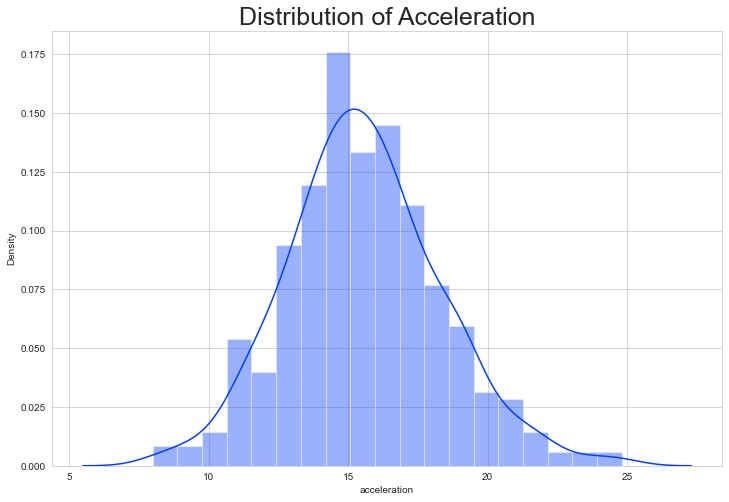

In [67]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Acceleration",fontsize=25)
sns.distplot(data["acceleration"])

#Distribution of horsepower of cars

<AxesSubplot:title={'center':'Distribution of horsepower'}, xlabel='horsepower', ylabel='Density'>

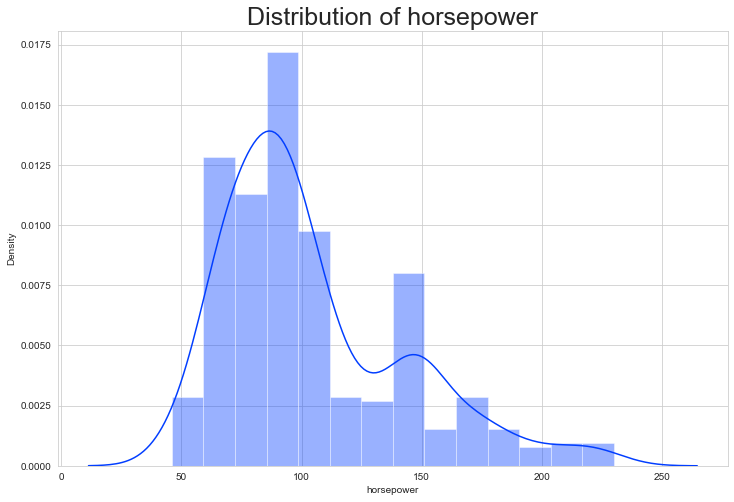

In [68]:
plt.figure(figsize=(12,8))
plt.title("Distribution of horsepower",fontsize=25)
sns.distplot(data['horsepower'])

Distribution of displacement of cars 

<AxesSubplot:title={'center':'distribution of displacement '}, xlabel='displacement', ylabel='Density'>

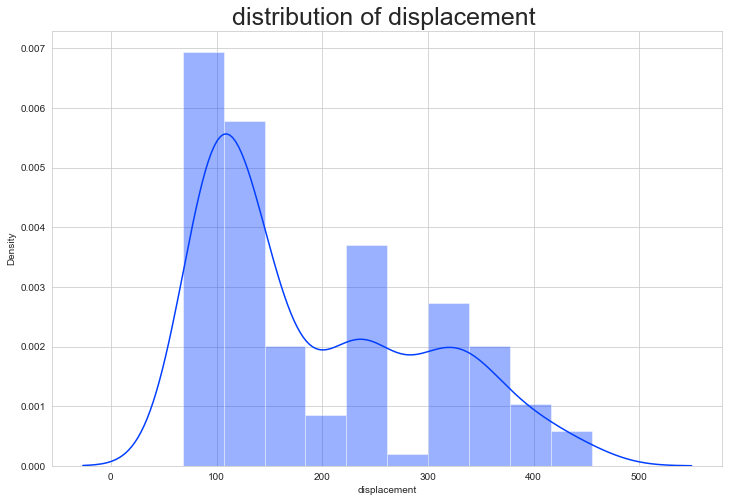

In [69]:
plt.figure(figsize=(12,8))
plt.title("distribution of displacement ",fontsize=25)
sns.distplot(data["displacement"])

JOINT PLOTS

MPG vs DISPLACEMENT


<Figure size 864x576 with 0 Axes>

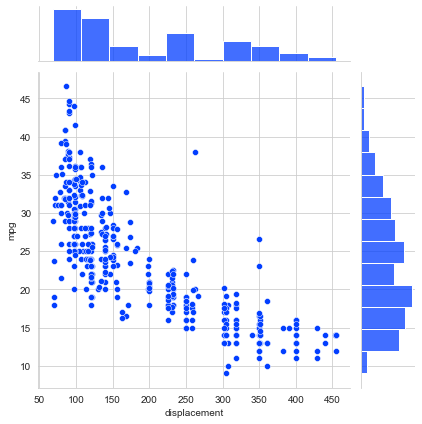

In [70]:
plt.figure(figsize=(12,8))

sns.jointplot("displacement","mpg",data)

MPG VS HORSEPOWER

<Figure size 864x576 with 0 Axes>

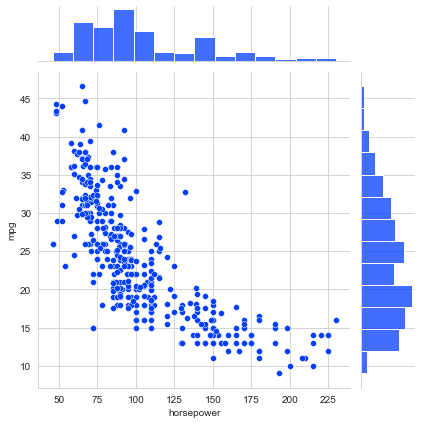

In [71]:
plt.figure(figsize=(12,8))
sns.jointplot("horsepower","mpg",data)

MPG vs WEIGHT

<Figure size 864x576 with 0 Axes>

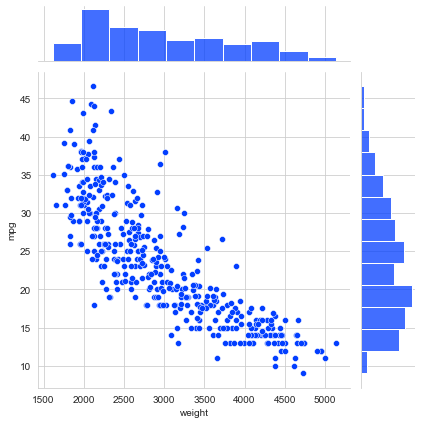

In [72]:
plt.figure(figsize=(12,8))
sns.jointplot("weight","mpg",data)

MPG vs acceleration

<Figure size 864x576 with 0 Axes>

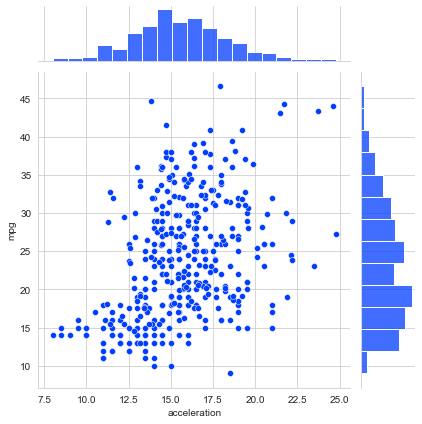

In [73]:
plt.figure(figsize=(12,8))
sns.jointplot("acceleration","mpg",data)

as we see MPG value decreases as we increase weight or horsepower or displacment

MPG value is increasing only when acceleration is increased 

3.VIOLIN and boxplots

MPG vs ORIGIN

<AxesSubplot:title={'center':'MPG values according to origin'}, xlabel='origin', ylabel='mpg'>

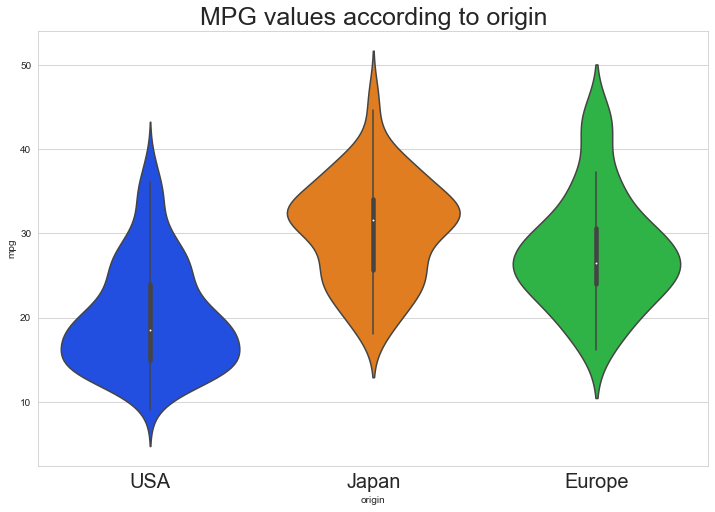

In [74]:
plt.figure(figsize=(12,8))
plt.title("MPG values according to origin",fontsize=25)
plt.xticks(fontsize=20)

sns.violinplot(x="origin",y="mpg",data=data)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

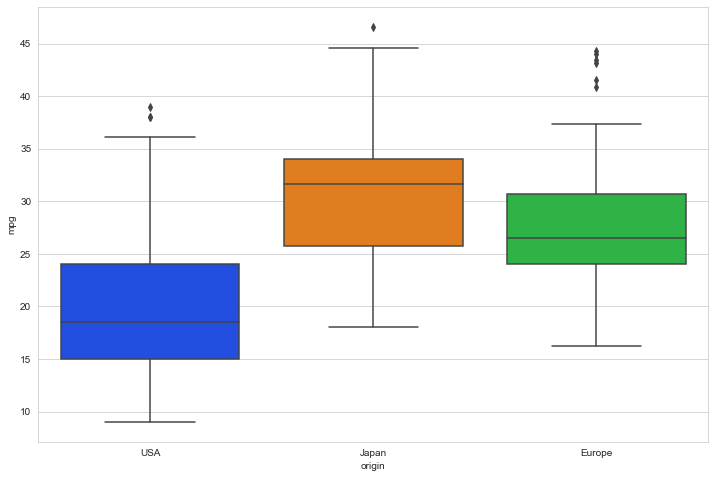

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(x="origin",y="mpg",data=data)

MPG vs MODEL_YEAR

<AxesSubplot:title={'center':'MPG vs MODELYEAR'}, xlabel='model year', ylabel='mpg'>

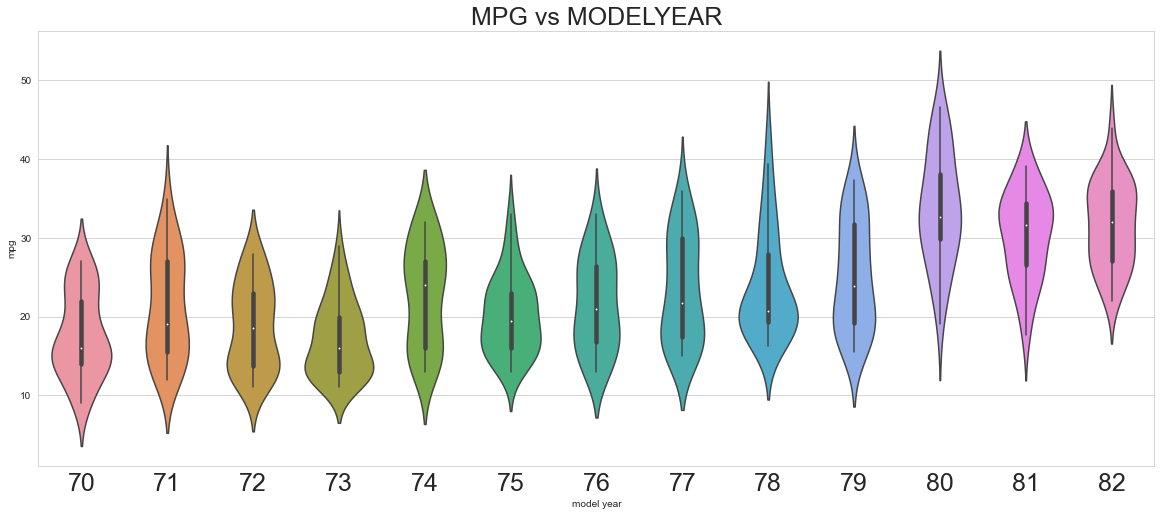

In [76]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=25)
plt.title("MPG vs MODELYEAR",fontsize=25)
sns.violinplot("model year","mpg",data=data)

<AxesSubplot:title={'center':'MPG values according to modelyear'}, xlabel='model year', ylabel='mpg'>

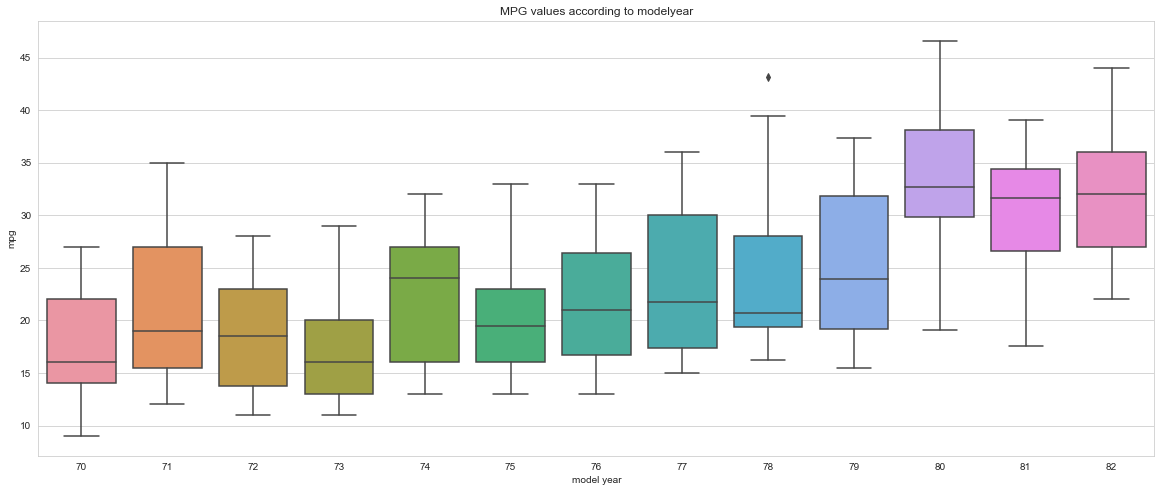

In [77]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to modelyear")
sns.boxplot(x="model year",y="mpg",data=data)

MPG vs BRAND

<AxesSubplot:title={'center':'MPG values according to brand'}, xlabel='brand', ylabel='mpg'>

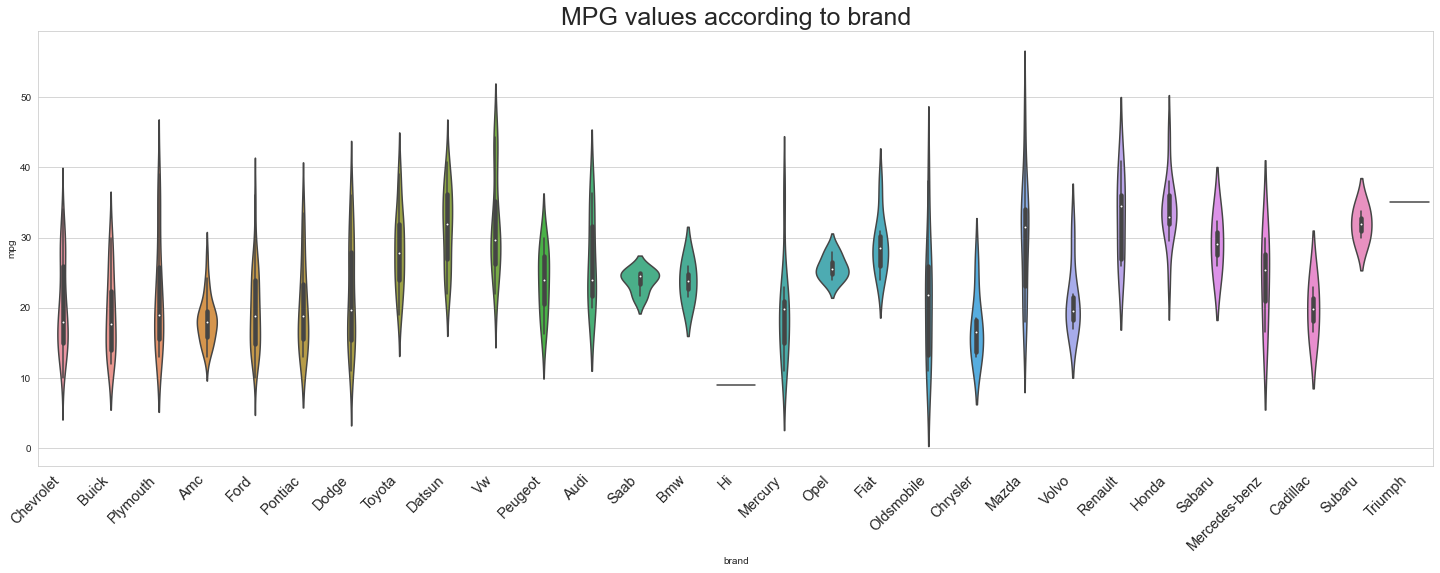

In [78]:
plt.figure(figsize=(25,8))
plt.title("MPG values according to brand",fontsize=25)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
sns.violinplot("brand","mpg",data=data)


<AxesSubplot:title={'center':'MPG values for each brands'}, xlabel='brand', ylabel='mpg'>

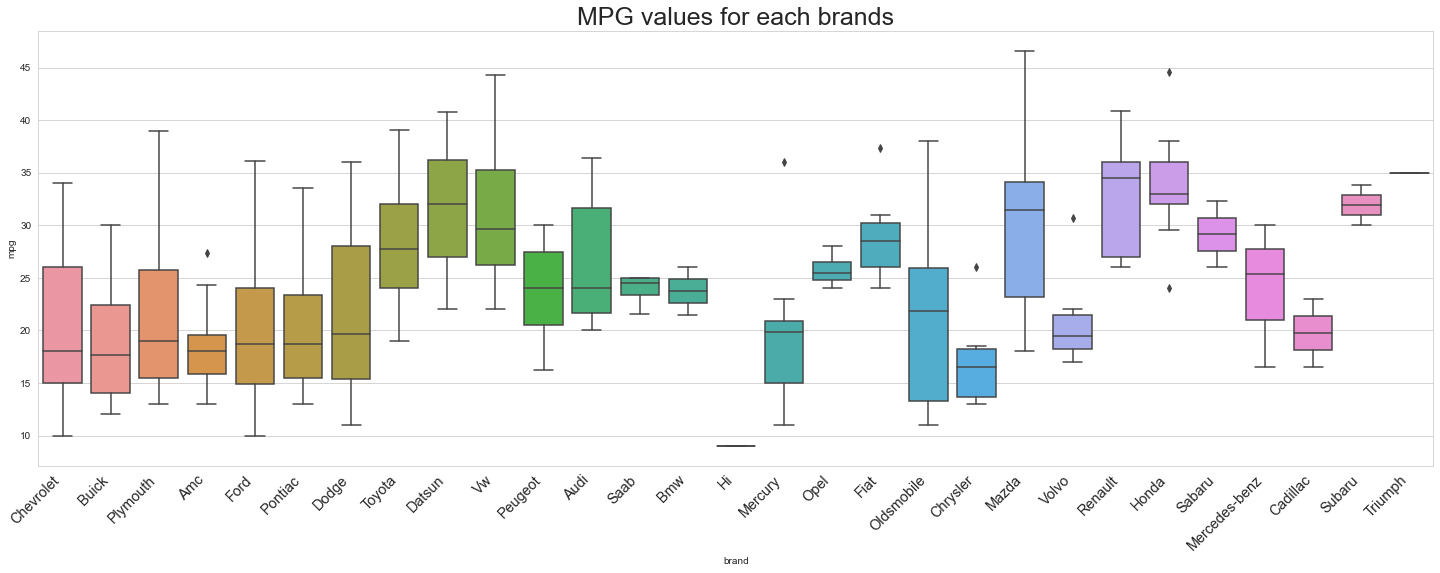

In [79]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.title("MPG values for each brands",fontsize=25)
sns.boxplot(x="brand",y="mpg",data=data)          

MPG vs cylinders

<AxesSubplot:title={'center':'MPG value according to cylinders'}, xlabel='cylinders', ylabel='mpg'>

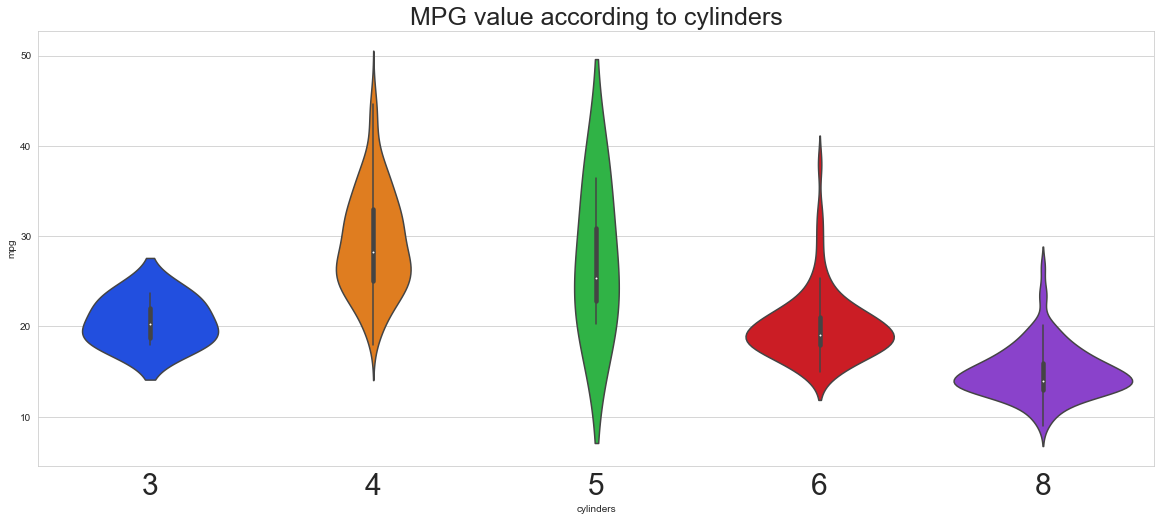

In [80]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=30)
plt.title("MPG value according to cylinders",fontsize=25)
sns.violinplot("cylinders","mpg",data=data)

<AxesSubplot:title={'center':'mpg values according to cylinders'}, xlabel='cylinders', ylabel='mpg'>

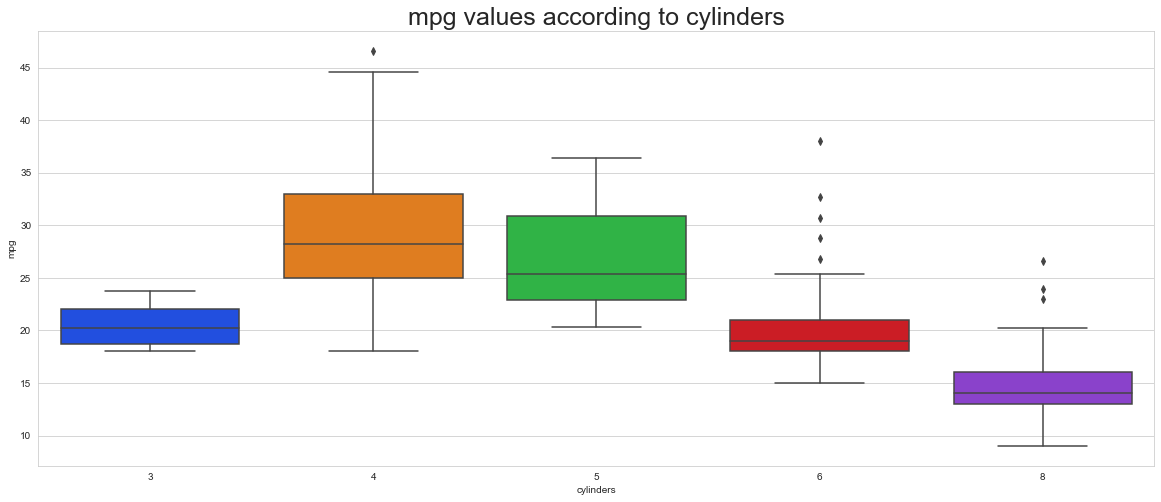

In [81]:
plt.figure(figsize=(20,8))
plt.title("mpg values according to cylinders",fontsize=25)
sns.boxplot(x="cylinders",y="mpg",data=data)

# 4.Heatmaps

4.1 heatmaps of correlation data

<AxesSubplot:>

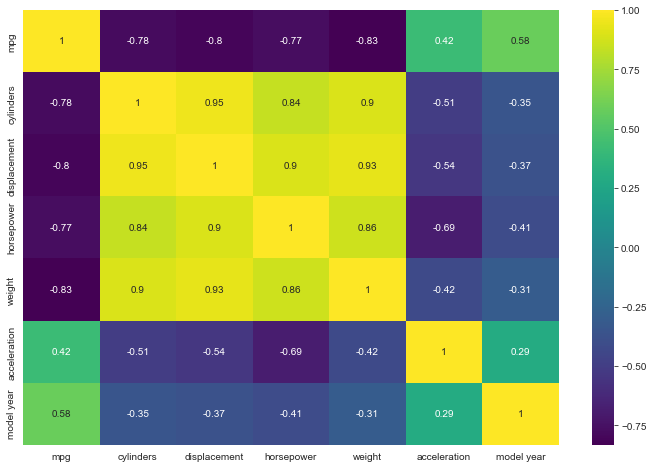

In [82]:
plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),annot=True,cmap="viridis")

Cluster map

<Figure size 864x576 with 0 Axes>

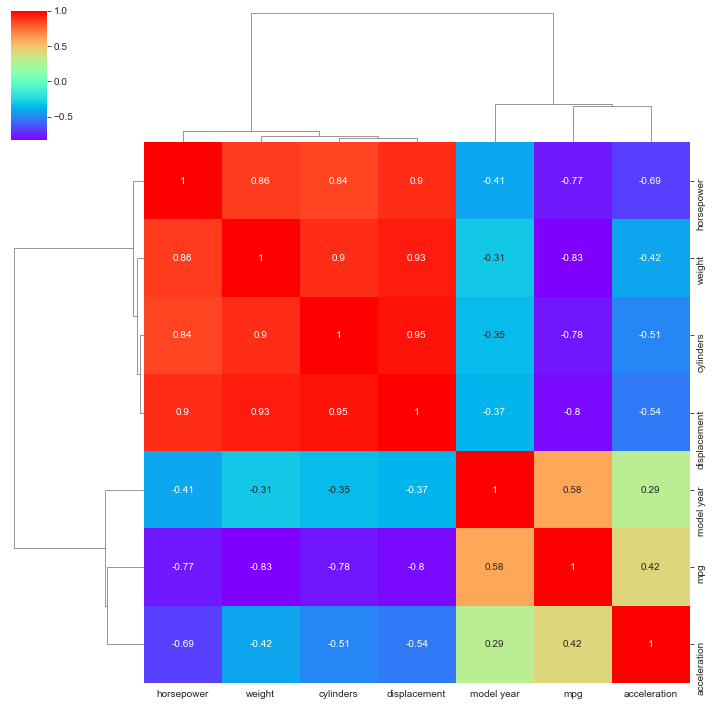

In [83]:
plt.figure(figsize=(12,8))
sns.clustermap(data.corr(),annot=True,cmap='rainbow')

Pairplot 

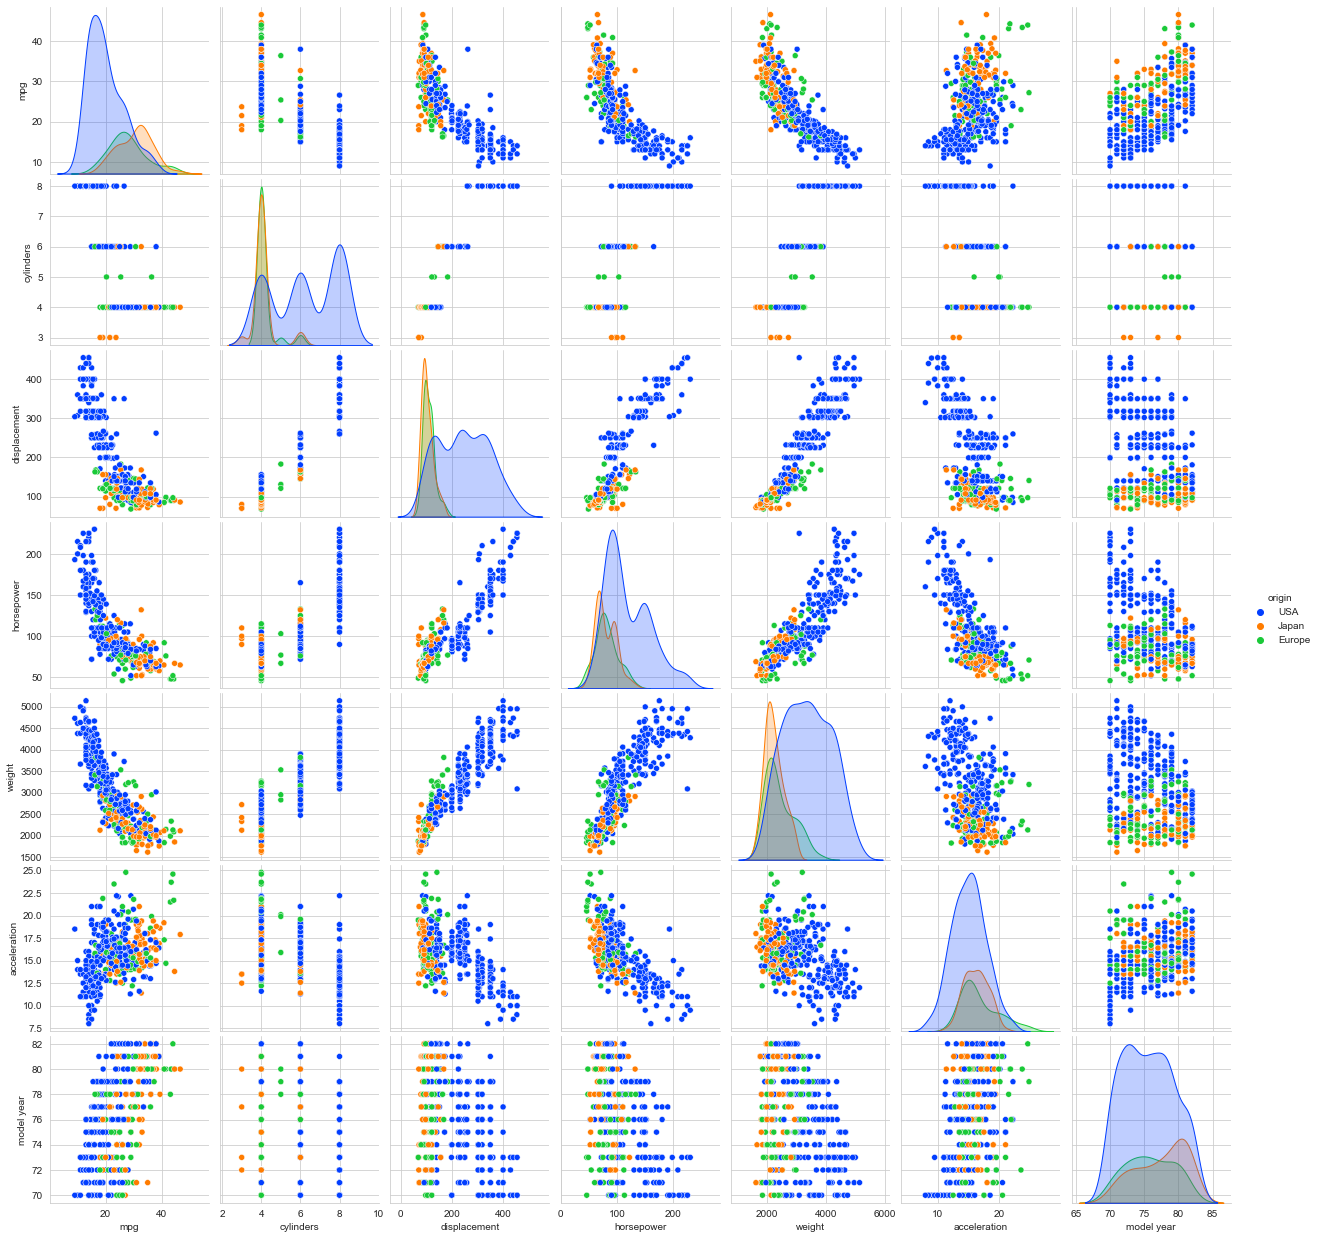

In [84]:
sns.pairplot(data,hue='origin')

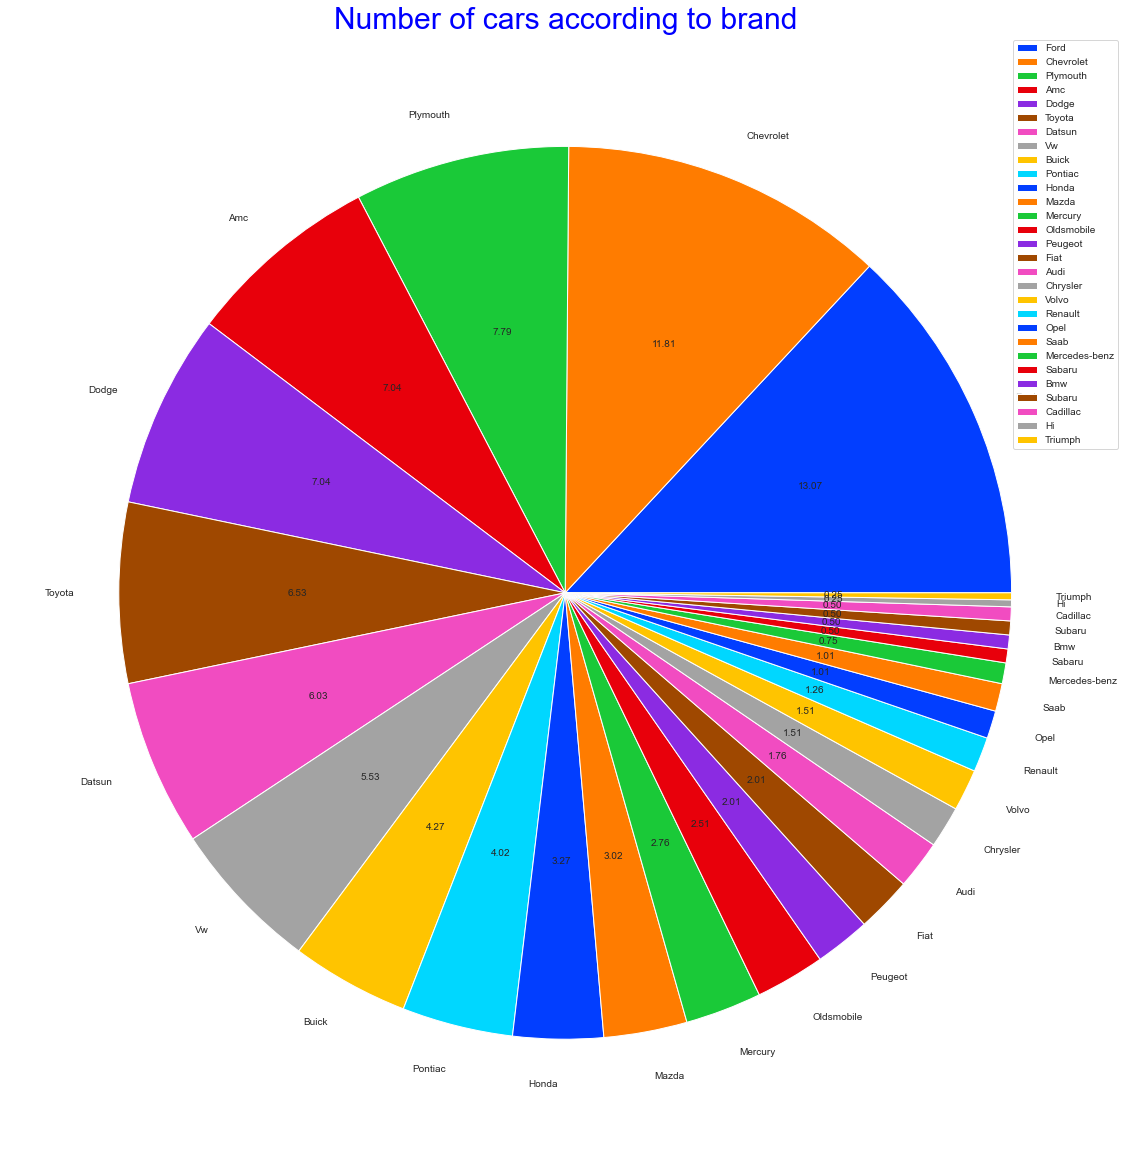

In [85]:
plt.figure(figsize=(20,30))
ax=data["brand"].value_counts()
labels=data["brand"].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
        
plt.title("Number of cars according to brand",fontsize=30,color='blue')
plt.legend()  
plt.show()        

Ford  has the most number of cars

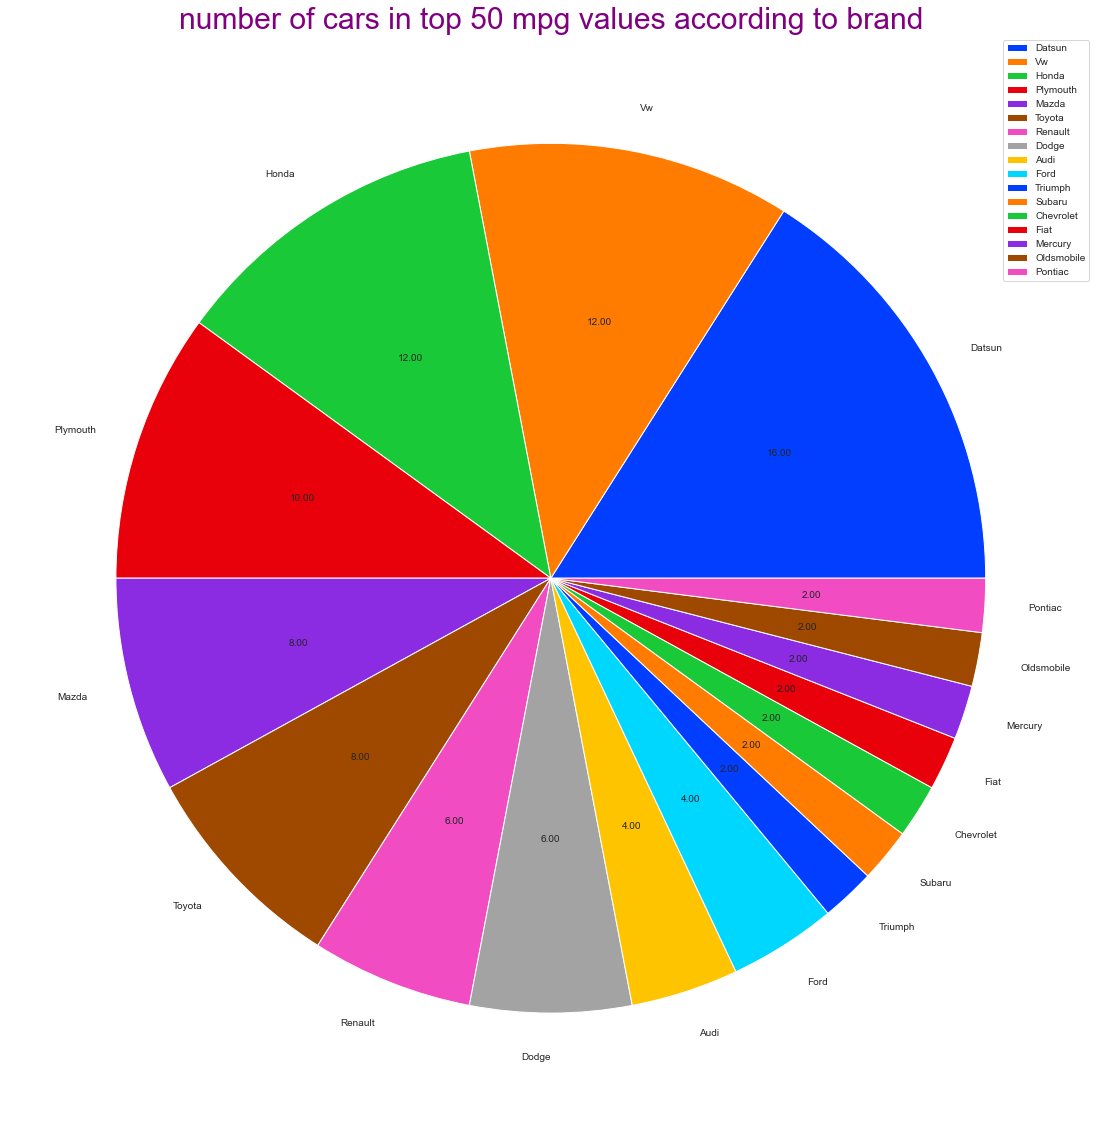

In [86]:
plt.figure(figsize=(20,20))
ax=data.sort_values(by="mpg",ascending=False)["brand"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["brand"][:50].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("number of cars in top 50 mpg values according to brand",fontsize=30,color='purple')
plt.legend()
plt.show()

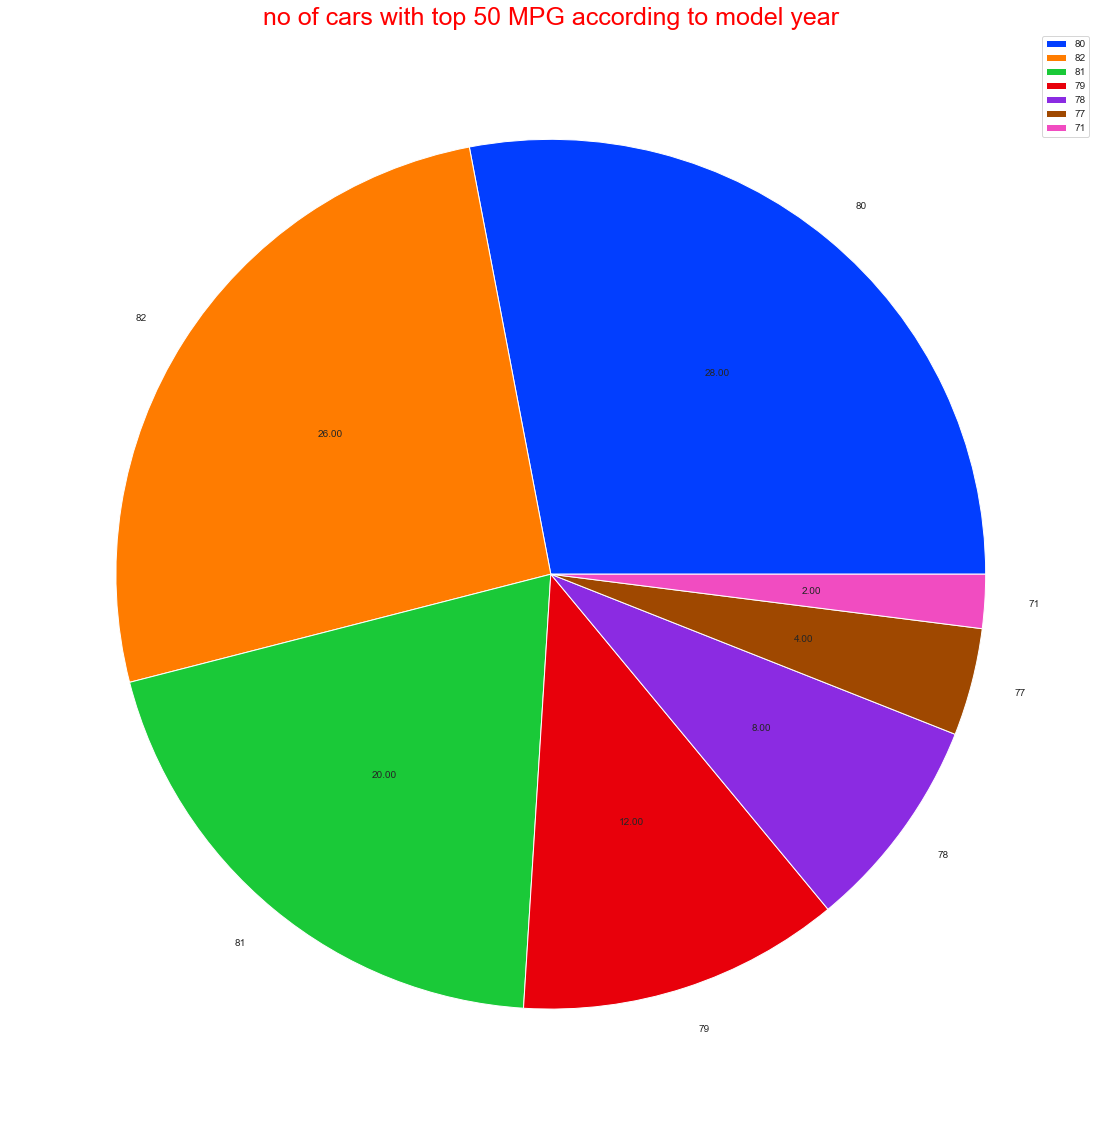

In [87]:
plt.figure(figsize=(20,20))
ax=data.sort_values(by="mpg",ascending=False)["model year"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["model year"][:50].value_counts().index
plt.title(" no of cars with top 50 MPG according to model year ",fontsize=25,color='RED')
plt.pie(ax,labels=labels,autopct="%.2f")
plt.legend()
plt.show()

cars of model year 80 has most number of cars in top 50 cars with highest mpg values 

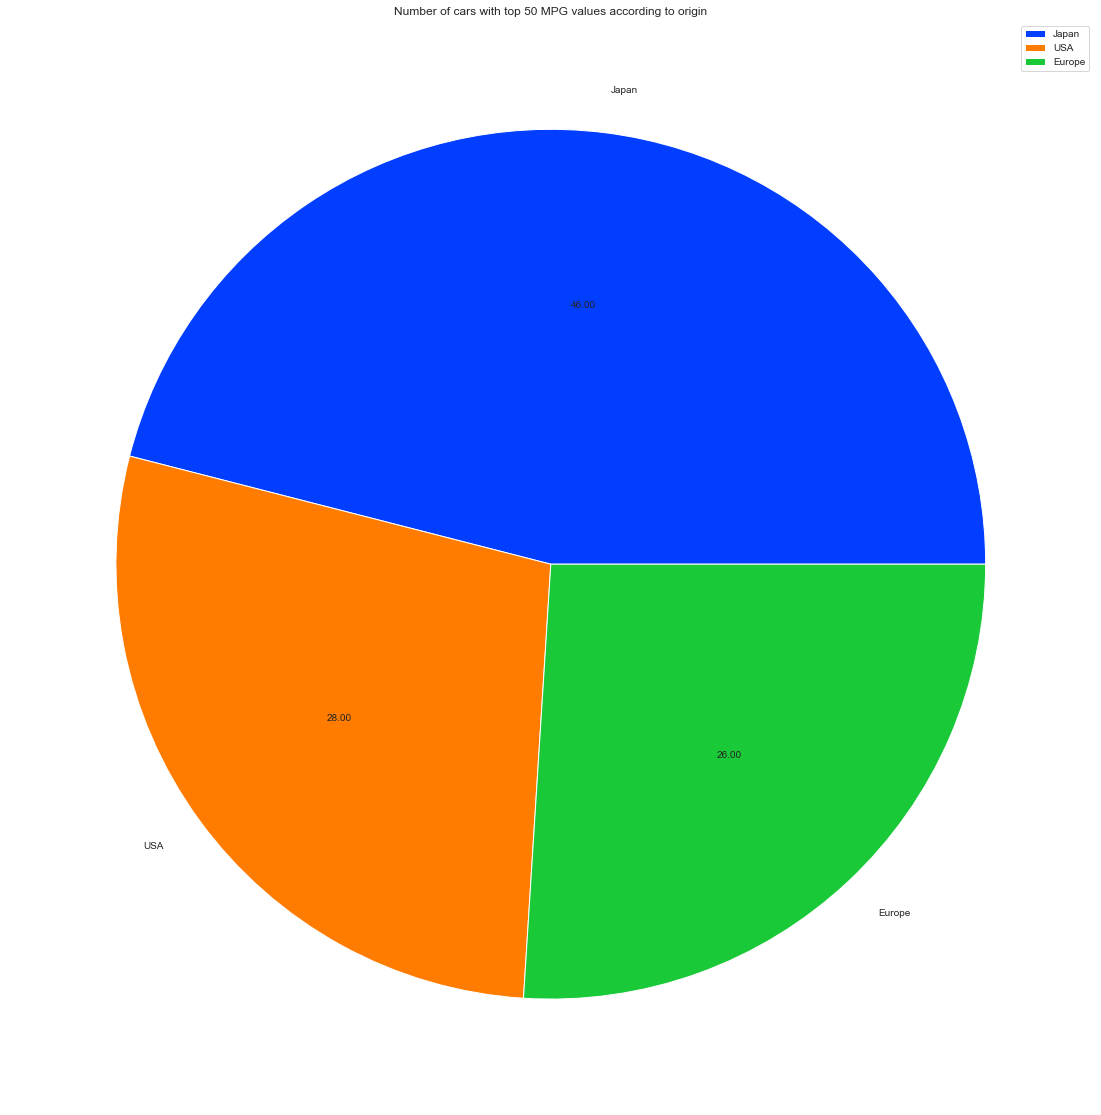

In [96]:
plt.figure(figsize=(20,20))
plt.title("Number of cars with top 50 MPG values according to origin")
ax=data.sort_values(by="mpg",ascending=False)["origin"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["origin"][:50].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.legend()
plt.show()

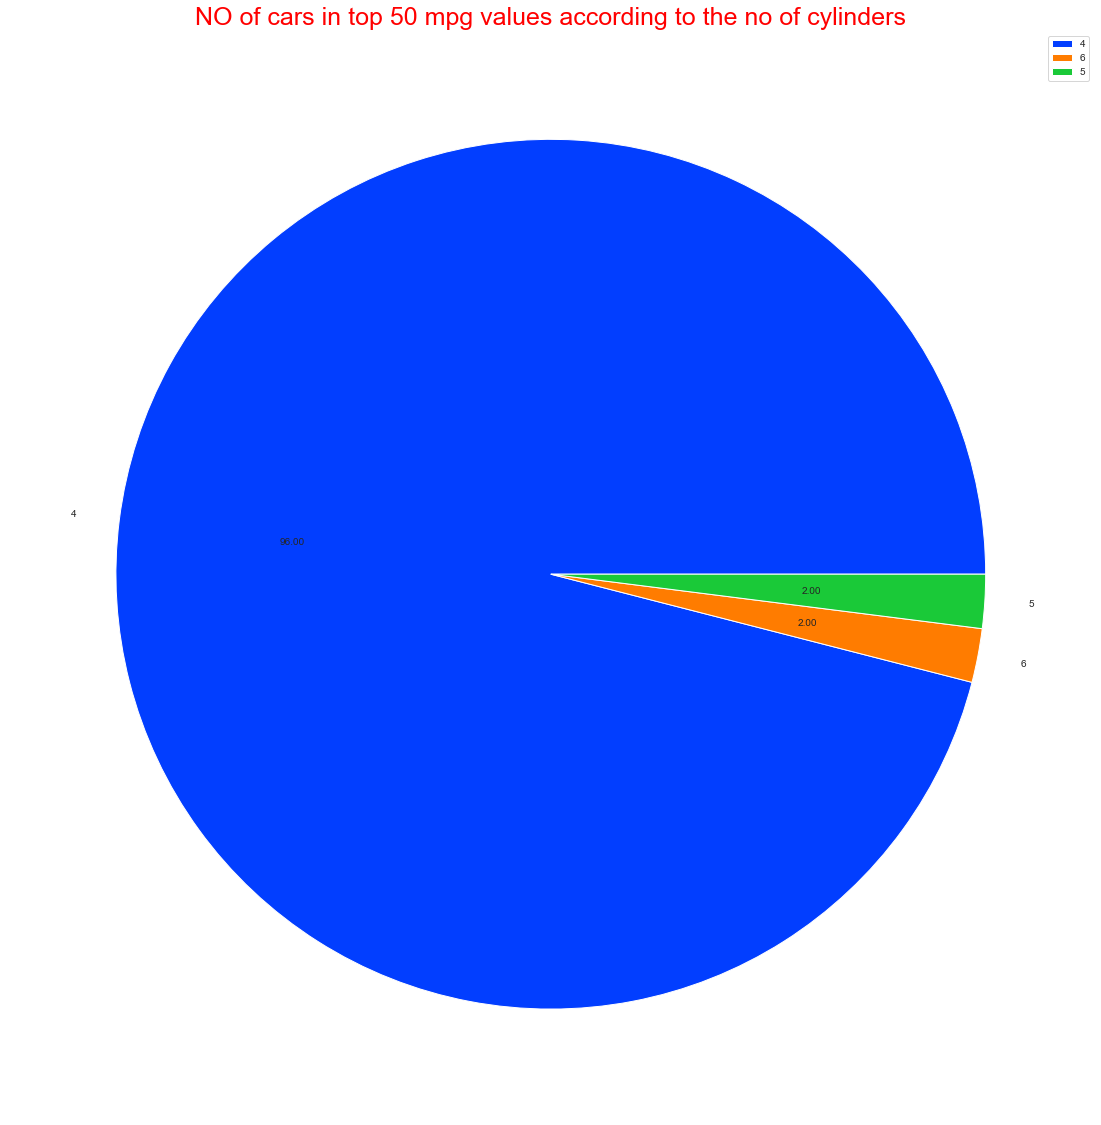

In [97]:
plt.figure(figsize=(20,20))
ax=data.sort_values(by="mpg",ascending=False)["cylinders"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["cylinders"][:50].value_counts().index
plt.title("NO of cars in top 50 mpg values according to the no of cylinders",fontsize=25,color='red')
plt.pie(ax,labels=labels,autopct='%.2f')
plt.legend()
plt.show()

cars with 4 cylinders have the most number of cars (48 out of 50 cars) in top 50 cars with highrst mpg values

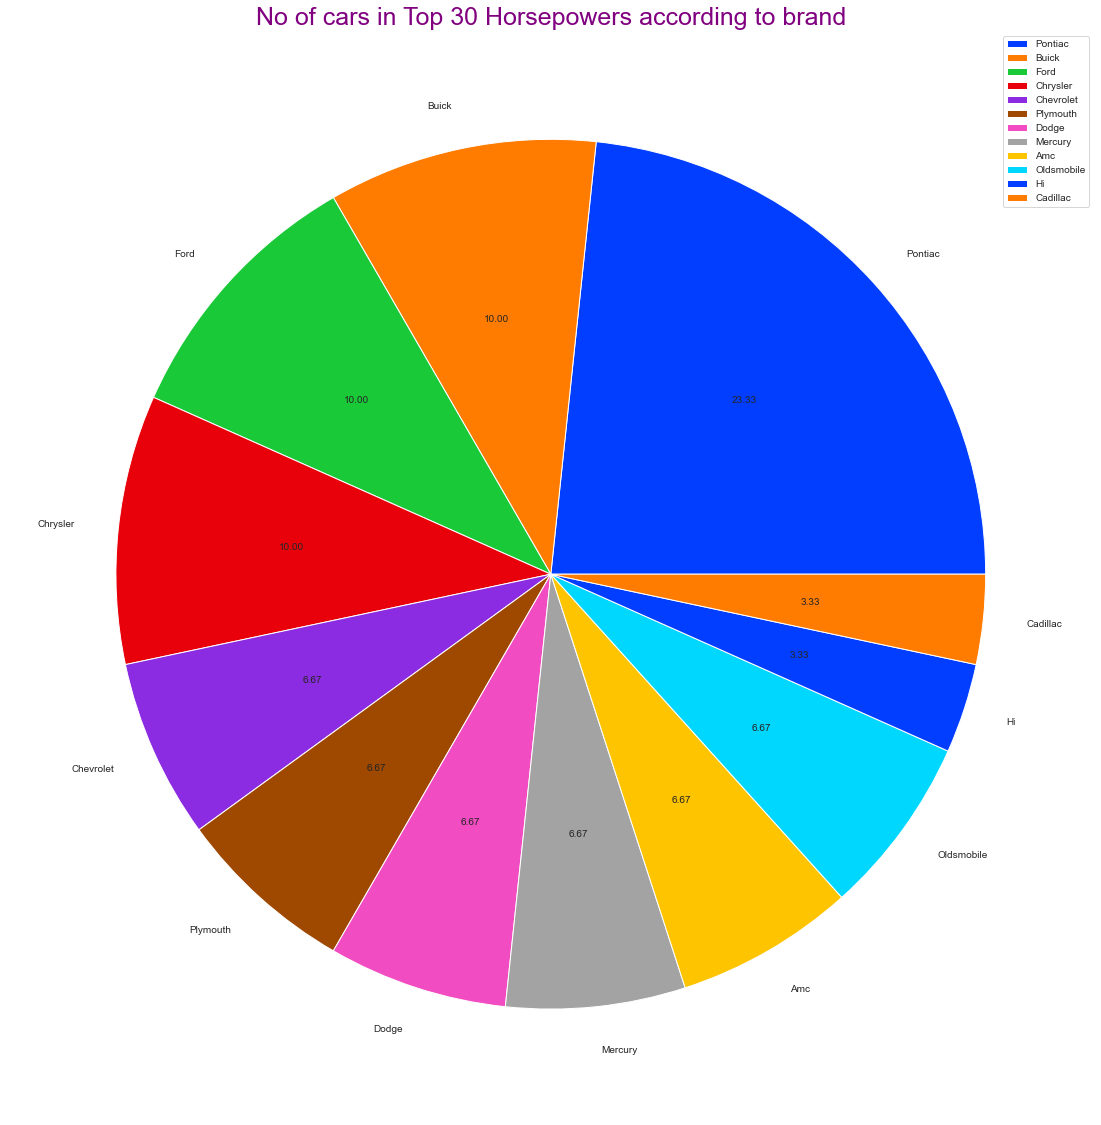

In [98]:
plt.figure(figsize=(20,20))
ax=data.sort_values(by="horsepower",ascending=False)["brand"][:30].value_counts()
labels=data.sort_values(by="horsepower",ascending=False)["brand"][:30].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("No of cars in Top 30 Horsepowers according to brand",fontsize=25,color="purple")
plt.legend()
plt.show()
                                                    
                                                    

# 5.Data Preprocessing 

In [99]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year origin      brand  
0          70    USA  Chevrolet  
1          70    USA      Buick  
2          70    USA   Plymouth  
3          70    USA        Amc  
4          70    USA       Ford

mpg column is target variable

In [100]:
y=data["mpg"].values

In [101]:
x=data.drop("mpg",axis=1).values

In [102]:
x[:10]

array([[8, 307.0, 130, 3504, 12.0, 70, 'USA', 'Chevrolet'],
       [8, 350.0, 165, 3693, 11.5, 70, 'USA', 'Buick'],
       [8, 318.0, 150, 3436, 11.0, 70, 'USA', 'Plymouth'],
       [8, 304.0, 150, 3433, 12.0, 70, 'USA', 'Amc'],
       [8, 302.0, 140, 3449, 10.5, 70, 'USA', 'Ford'],
       [8, 429.0, 198, 4341, 10.0, 70, 'USA', 'Ford'],
       [8, 454.0, 220, 4354, 9.0, 70, 'USA', 'Chevrolet'],
       [8, 440.0, 215, 4312, 8.5, 70, 'USA', 'Plymouth'],
       [8, 455.0, 225, 4425, 10.0, 70, 'USA', 'Pontiac'],
       [8, 390.0, 190, 3850, 8.5, 70, 'USA', 'Amc']], dtype=object)

In [103]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [104]:
x.shape

(398, 8)

In [105]:
y.shape

(398,)

# 5.2 Encoding categorical data

OneHotEncoding

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],remainder='passthrough')
x_s=np.array(ct.fit_transform(x))
x_s[9]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 390.0, 190, 3850, 8.5, 70,
       'Amc'], dtype=object)

In [107]:
x_s[:,8:]

array([[307.0, 130, 3504, 12.0, 70, 'Chevrolet'],
       [350.0, 165, 3693, 11.5, 70, 'Buick'],
       [318.0, 150, 3436, 11.0, 70, 'Plymouth'],
       ...,
       [135.0, 84, 2295, 11.6, 82, 'Dodge'],
       [120.0, 79, 2625, 18.6, 82, 'Ford'],
       [119.0, 82, 2720, 19.4, 82, 'Chevrolet']], dtype=object)

# LabelEncoding

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le_brand=LabelEncoder()
le_year=LabelEncoder()
x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 307.0, 130, 3504, 12.0,
        0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 165, 3693, 11.5,
        0, 3]], dtype=object)

In [110]:
new_data=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model year","brand"])
new_data.head()

3    4    5    6    8 Europe Japan  USA displacement horsepower weight  \
0  0.0  0.0  0.0  0.0  1.0    0.0   0.0  1.0        307.0        130   3504   
1  0.0  0.0  0.0  0.0  1.0    0.0   0.0  1.0        350.0        165   3693   
2  0.0  0.0  0.0  0.0  1.0    0.0   0.0  1.0        318.0        150   3436   
3  0.0  0.0  0.0  0.0  1.0    0.0   0.0  1.0        304.0        150   3433   
4  0.0  0.0  0.0  0.0  1.0    0.0   0.0  1.0        302.0        140   3449   

  acceleration model year brand  
0         12.0          0     5  
1         11.5          0     3  
2         11.0          0    19  
3         12.0          0     0  
4         10.5          0    10

In [111]:
new_data["3"]=new_data["3"].astype(int)
new_data["4"]=new_data["4"].astype(int)
new_data["5"]=new_data["5"].astype(int)
new_data["6"]=new_data["6"].astype(int)
new_data["8"]=new_data["8"].astype(int)
new_data["Europe"]=new_data["Europe"].astype(int)
new_data["Japan"]=new_data["Japan"].astype(int)
new_data["USA"]=new_data["USA"].astype(int)
new_data["displacement"]=new_data["displacement"].astype(int)
new_data["acceleration"]=new_data["acceleration"].astype(int)

In [112]:
new_data.head()

3  4  5  6  8  Europe  Japan  USA  displacement horsepower weight  \
0  0  0  0  0  1       0      0    1           307        130   3504   
1  0  0  0  0  1       0      0    1           350        165   3693   
2  0  0  0  0  1       0      0    1           318        150   3436   
3  0  0  0  0  1       0      0    1           304        150   3433   
4  0  0  0  0  1       0      0    1           302        140   3449   

   acceleration model year brand  
0            12          0     5  
1            11          0     3  
2            11          0    19  
3            12          0     0  
4            10          0    10

first eight columns have beeen binary 

the last two columns have been labelled values 

In [113]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [114]:
x_train

array([[0.0, 1.0, 0.0, ..., 16.5, 4, 10],
       [0.0, 0.0, 0.0, ..., 17.8, 6, 0],
       [0.0, 1.0, 0.0, ..., 17.9, 10, 13],
       ...,
       [0.0, 1.0, 0.0, ..., 16.5, 8, 5],
       [0.0, 1.0, 0.0, ..., 16.9, 6, 17],
       [0.0, 0.0, 0.0, ..., 12.5, 3, 16]], dtype=object)

In [115]:
x_test.shape

(278, 14)

# 5.4 feature scaling

In [116]:
x_train[:2]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 122.0, 80, 2451, 16.5, 4,
        10],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 258.0, 95, 3193, 17.8, 6,
        0]], dtype=object)

in X 
Numerical column starts from 8 and ends at 11

column 8 is displacement|
column 9 is horsepower|
column 10 is weight |
column 11 is acceleration

In [117]:
x_train_scaled=x_train
x_test_scaled=x_test

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled[:,8:12]=sc.fit_transform(x_train_scaled[:,8:12])
x_test_scaled[:,8:12]=sc.fit_transform(x_test_scaled[:,8:12])
x_train_scaled

array([[0.0, 1.0, 0.0, ..., 0.37907409443440127, 4, 10],
       [0.0, 0.0, 0.0, ..., 0.8532966985383855, 6, 0],
       [0.0, 1.0, 0.0, ..., 0.8897753603925374, 10, 13],
       ...,
       [0.0, 1.0, 0.0, ..., 0.37907409443440127, 8, 5],
       [0.0, 1.0, 0.0, ..., 0.5249887418510112, 6, 17],
       [0.0, 0.0, 0.0, ..., -1.0800723797317033, 3, 16]], dtype=object)

In [119]:
x_train

array([[0.0, 1.0, 0.0, ..., 0.37907409443440127, 4, 10],
       [0.0, 0.0, 0.0, ..., 0.8532966985383855, 6, 0],
       [0.0, 1.0, 0.0, ..., 0.8897753603925374, 10, 13],
       ...,
       [0.0, 1.0, 0.0, ..., 0.37907409443440127, 8, 5],
       [0.0, 1.0, 0.0, ..., 0.5249887418510112, 6, 17],
       [0.0, 0.0, 0.0, ..., -1.0800723797317033, 3, 16]], dtype=object)

# 6.Machine learning models

# 6.1 Linear Regression

Training the model

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
Lr=LinearRegression()
Lr_fs=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

# Model Prediction

In [122]:
predictions=Lr.predict(x_test)

# Evaluating the model

In [123]:
from sklearn.metrics import mean_squared_error,r2_score
mse_Lr=mean_squared_error(y_test,predictions)
print(np.sqrt(mse_Lr))

3.348091813592806


In [124]:
lin_score=r2_score(y_test,predictions)*100
print(lin_score)

81.35673965010048


In [125]:
y_train

array([26. , 17.5, 46.6, 12. , 13. , 21.5, 44. , 23.8, 26. , 23. , 19.8,
       26.4, 32.3, 31. , 16.9, 13. , 15. , 15. , 28. , 26. , 13. , 17.6,
       30.5, 18.2, 16. , 33. , 26.5, 27.2, 15.5, 14. , 18.6, 37.2, 25.5,
       26. , 21.5, 14. , 27. , 30. , 15. , 21. , 36. , 14. , 24. , 15. ,
       19.2, 16. , 29. , 23. , 17.6, 32.8, 18. , 18.1, 20. , 25.1, 17. ,
       24. , 37.7, 26. , 16. , 36. , 27.2, 30. , 34.1, 18.5, 19.2, 19.4,
       32. , 31.9, 16. , 14. , 18. , 27. , 22. , 23.5, 14. , 14. , 24. ,
       15. , 21. , 17.5, 24. , 22. , 37. , 32.9, 17. , 38. , 32.4, 23.7,
       16.5, 12. , 31. , 23. , 20. , 44.3, 25.4, 15. , 14. , 12. , 26.6,
       15. , 38. , 15. , 34.5, 31. , 16.5, 29. , 18. , 36. , 19. , 16. ,
       21. , 15. , 29. , 17.5, 17.7, 26.8, 29. , 30. , 25. , 12. ])

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

# 6.3 Random Forest Regression

Training the Model 

In [128]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [129]:
p_forest=randomforest.predict(x_test)

In [130]:
forest_score=r2_score(y_test,p_forest)*100

In [131]:
print(forest_score)

91.11194379127456


# 6.4. Lasso

Training the model

In [132]:
from sklearn.linear_model import Lasso
lass=Lasso()
lass.fit(x_train,y_train)

Lasso()

In [133]:
p_lasso=lass.predict(x_test)

In [134]:
lass_score=r2_score(y_test,p_lasso)*100
print(lass_score)

81.07341221176999


# 6.5 Ridge Regression

Training the model

In [135]:
from sklearn.linear_model import Ridge

In [136]:
ridge=Ridge()
ridge.fit(x_train,y_train)
p_ridge=ridge.predict(x_test)
ridge_score=r2_score(y_test,p_ridge)*100
print(ridge_score)



85.20426802576802


# 6.6 ElasticNet Regressor

In [137]:
from sklearn.linear_model import ElasticNet

In [138]:
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)

#model prediction
p_elasticnet=elasticnet.predict(x_test)

# evaluating the model
elasticnet_score=r2_score(y_test,p_elasticnet)*100
print(elasticnet_score)

81.20513249512776


In [139]:
 score=pd.DataFrame({'Model name':['Linear regressor','randomforest regressor','lasso regressor','ridge regressor','elasticnet regressor'],"accuracy score":[lin_score,forest_score,lass_score,ridge_score,elasticnet_score]})

In [140]:
score

Model name  accuracy score
0        Linear regressor       81.356740
1  randomforest regressor       91.111944
2         lasso regressor       81.073412
3         ridge regressor       85.204268
4    elasticnet regressor       81.205132

# as you can see from the above data random forest regressor gives the highest accuracy score